<a href="https://colab.research.google.com/github/Je-Hyeon/Je-Hyeon/blob/main/Pandas%EC%9D%98_%EA%B1%B0%EC%9D%98_%EB%AA%A8%EB%93%A0%EA%B2%83(%EC%9D%B4%EC%88%98%EC%95%88).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas 한번에 제대로 배우기







---



In [1]:
import numpy as np
import pandas as pd

## value_counts() , isin

* 왜 values count가 아니라 value counts일까?

In [ ]:
s= pd.Series([1,2,3,4,5], index=[2,4,6,8,10])
s

2     1
4     2
6     3
8     4
10    5
dtype: int64

In [ ]:
# value_counts -> 해당하는 값이 몇개 있는 지 리턴한다.

s.value_counts()

5    1
4    1
3    1
2    1
1    1
dtype: int64

In [ ]:
s.isin([2,4])

2     False
4      True
6     False
8      True
10    False
dtype: bool

## keys(), items()

In [ ]:
#  df.items()는 시리즈에만 동작하고, 데이터프레임에는 동작하지 않는다.
## df.keys()는 시리즈,데이터프레임 둘다 동작한다

s.keys()

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [ ]:
# items() 함수는 key vallue를 튜플로 묶어서 가져온다.
s.items() 

list(s.items())
  #items함수는 zip으로 묶여서 온다. 따라서 리스트로 묶어야 읽을 수 있다.

[('a', 0.0), ('b', 0.25), ('c', 5.0), ('d', 4.0), ('e', 6.0)]

## ? Index 객체?

1. 인덱스 객체는 사실 용도를 잘 모르겠다. 아무 정보도 저장되지 않은 인덱스만 만들어 두는 것인가?


In [ ]:
idx = pd.Index([2,4,6,8,10])
idx 

Int64Index([2, 4, 6, 8, 10], dtype='int64')

In [ ]:
idx[0]

2

In [ ]:
idx[0:3]

Int64Index([2, 4, 6], dtype='int64')

In [ ]:
print(idx)
print(idx.size)
print(idx.shape)  #1차원을 가진다
print(idx.ndim)   #1차원이기 때문에 1로 뜬다
print(idx.dtype)

Int64Index([2, 4, 6, 8, 10], dtype='int64')
5
(5,)
1
int64


#### Index 연산

In [ ]:
# 캡쳐본 탭에 저장 되어있음

idx1 = pd.Index([1,2,4,6,8])
idx2 = pd.Index([2,4,5,6,7])

print(idx1.append(idx2)) 
# append는 그냥 합친다. 겹치는 게 있어도 고려하지 않고, 무지성으로 그냥 인덱스를 합친다.

print(idx1.difference(idx2)) 
#차집합을 구한다 

print(idx.intersection(idx2))  
print(idx1 & idx2)
# 교집합을 구한다.

print(idx1.union(idx2))
print(idx1 | idx2)
#중복이 허용되지 않는다. 똑똑하게 겹치지 않게 인덱스를 합치려면 union을 사용해야 한다.(합집합)

print(idx1.delete(0))   # 0번째 drop
print(idx1.drop(1))     # 1을 drop (1번째 X)

print(idx1 ^ idx2) 
# 여집합을 구한다 (겹치지 않는 것)

Int64Index([1, 2, 4, 6, 8, 2, 4, 5, 6, 7], dtype='int64')
Int64Index([1, 8], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([2, 4, 6], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([1, 2, 4, 5, 6, 7, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([2, 4, 6, 8], dtype='int64')
Int64Index([1, 5, 7, 8], dtype='int64')




---



## Indexing = 추출

In [ ]:
s = pd.Series([0, 0.25, 5, 4, 6],
              index = ['a', 'b','c','d','e'])
s

a    0.00
b    0.25
c    5.00
d    4.00
e    6.00
dtype: float64

### Series

#### Series 새로운 행 추가

In [ ]:
# 시리즈에 새로운 키, 값 추가하기

s['f'] = 100
s           

a      0.00
b      0.25
c      5.00
d      4.00
e      6.00
f    100.00
dtype: float64

#### 조건을 이용한 Series 인덱싱

In [ ]:
# 조건을 사용한 시리즈 슬라이싱 -> 조건에 해당하는 값들만 출력된다.

s[(s > 4.9) & (s < 10)]

c    5.0
e    6.0
dtype: float64

#### Series reindex()

* method=   -> 주어줄 수 있음...

In [ ]:
s = pd.Series(['a','b','c','d','e'], index = [1,3,5,7,9])
s

1    a
3    b
5    c
7    d
9    e
dtype: object

In [ ]:
# reindex()  -> 인덱스를 바꿀 수 있다.
## 없는 값은 NaN으로 채운다

s.reindex(range(10))  

0    NaN
1      a
2    NaN
3      b
4    NaN
5      c
6    NaN
7      d
8    NaN
9      e
dtype: object

In [ ]:
# reindex에서 NaN을 만들기 싫다면?
## method= 값을 주면 된다.

s.reindex(range(10), method = 'bfill')    # bfill 은 전 값과 똑같은 값을 채운다.

0    a
1    a
2    b
3    b
4    c
5    c
6    d
7    d
8    e
9    e
dtype: object

### DataFrame

#### DataFrame에 새로운 열 추가

In [ ]:
# 사용할 df만들기
korea_df = pd.DataFrame({'population': [100,50,45,40,30,10],
                         'male_pop':[51,26,23,21,16,6],
                         'female_pop': [49,24,22,19,14,4]}, index= ['서울','부산','인천','대구','광주','울산'])
korea_df

,population,male_pop,female_pop
서울,100,51,49
부산,50,26,24
인천,45,23,22
대구,40,21,19
광주,30,16,14
울산,10,6,4


In [ ]:
# 기존에 있는 데이터프레임에 새로운 데이터 프레임 추가하기

korea_df['rate'] = ( korea_df['male_pop'] * 100 / korea_df['female_pop'])

korea_df['rate']

서울    104.081633
부산    108.333333
인천    104.545455
대구    110.526316
광주    114.285714
울산    150.000000
Name: rate, dtype: float64

In [ ]:
# 새로운 정보가 추가된 데이터프레임을 볼 수 있다.
korea_df

,population,male_pop,female_pop,rate
서울,100,51,49,104.081633
부산,50,26,24,108.333333
인천,45,23,22,104.545455
대구,40,21,19,110.526316
광주,30,16,14,114.285714
울산,10,6,4,150.000000


#### 조건을 이용한 DataFrame 인덱싱

In [ ]:
# 조건을 걸어서 DataFrame 추출하기

korea_df.loc[(korea_df.population > 30)] 

# 앞에서도 봤지만, korea_df에서 조건에 맞는 것을 출력하는 것이다.

,population,pop of male,pop of female,rate_of_male_and_female
서울,100,51,49,104.081633
부산,50,26,24,108.333333
인천,45,23,22,104.545455
대구,40,21,19,110.526316


In [ ]:
korea_df.loc[(korea_df.population < 40)]

,population,male_pop,female_pop,rate
광주,30,16,14,114.285714
울산,10,6,4,150.000000


In [ ]:
# 연산자를 활용해 조건 여러 개 걸기

korea_df.loc[(korea_df.population > 30) & (korea_df.population < 99)]

,population,male_pop,female_pop,rate
부산,50,26,24,108.333333
인천,45,23,22,104.545455
대구,40,21,19,110.526316


### 다중 인덱싱(Multi Indexing)

* 두개의 다중인덱싱은 데이터프레임의 stack된 형태라고도 생각할 수 있겠군...

In [ ]:
korea_df

,population,male_pop,female_pop,rate
서울,100,51,49,104.081633
부산,50,26,24,108.333333
인천,45,23,22,104.545455
대구,40,21,19,110.526316
광주,30,16,14,114.285714
울산,10,6,4,150.000000


#### 멀티인덱스 만들기(pd.MultiIndex)

In [ ]:
# 인덱싱을 구성하는 단계
idx_tuples = [ ('서울', 2010), ('서울', 2020),
                ('부산', 2010), ('부산', 2020),
                ('인천', 2010), ('인천', 2020),
                ('대구', 2010), ('대구', 2020),
                ('광주', 2010), ('광주', 2020),
                ('울산', 2010), ('울산', 2020)
              ]
idx_tuples 

[('서울', 2010),
 ('서울', 2020),
 ('부산', 2010),
 ('부산', 2020),
 ('인천', 2010),
 ('인천', 2020),
 ('대구', 2010),
 ('대구', 2020),
 ('광주', 2010),
 ('광주', 2020),
 ('울산', 2010),
 ('울산', 2020)]

In [ ]:
pop_tuples = [100,98,
              45,50,
              41,43,
              32,35,
              24,26,
              15,18]

# 시리즈로 만들어 주자
population = pd.Series(pop_tuples, index = idx_tuples)
population

(서울, 2010)    100
(서울, 2020)     98
(부산, 2010)     45
(부산, 2020)     50
(인천, 2010)     41
(인천, 2020)     43
(대구, 2010)     32
(대구, 2020)     35
(광주, 2010)     24
(광주, 2020)     26
(울산, 2010)     15
(울산, 2020)     18
dtype: int64

In [ ]:
# 멀티인덱스 만들기 -> 위에서한 방식처럼 직접 만들고, 인덱스로 만들어줘야함.
## idx_tuples를 튜플 형태로 만들어 뒀기 때문에, from_tuples를 사용해야 한다.

midx = pd.MultiIndex.from_tuples(idx_tuples)
midx                                     

MultiIndex([('서울', 2010),
            ('서울', 2020),
            ('부산', 2010),
            ('부산', 2020),
            ('인천', 2010),
            ('인천', 2020),
            ('대구', 2010),
            ('대구', 2020),
            ('광주', 2010),
            ('광주', 2020),
            ('울산', 2010),
            ('울산', 2020)],
           )

In [ ]:
population = population.reindex(midx)
population

# 멀티인덱스를 통해서 구분이 되었다.

서울  2010    100
    2020     98
부산  2010     45
    2020     50
인천  2010     41
    2020     43
대구  2010     32
    2020     35
광주  2010     24
    2020     26
울산  2010     15
    2020     18
dtype: int64

#### 멀티인덱스 슬라이싱

In [ ]:
population[: , 2010]

서울    100
부산     45
인천     41
대구     32
광주     24
울산     15
dtype: int64

In [ ]:
population['인천']

2010    41
2020    43
dtype: int64

In [ ]:
# 수도권의 2010년만 출력해보자   -> 복잡하다.. 이것 저것 해보니 되는 군

population[['서울' , '인천']][:, 2010]

서울    100
인천     41
dtype: int64

In [ ]:
# unstack()
population.unstack()                           

,2010,2020
광주,24,26
대구,32,35
부산,45,50
서울,100,98
울산,15,18
인천,41,43


#### 멀티인덱스에 새로운 열추가

In [ ]:
# 멀티인덱스로 만들어 둔 데이터프레임에 새로운 데이터를 추가해보자!!

male_tuples = [51,47,
               17,16,
               13, 14,
               12, 11,
               7,7,
               7,7]
male_tuples

[51, 47, 17, 16, 13, 14, 12, 11, 7, 7, 7, 7]

In [ ]:
# 그냥 그래도 가져다 붙이면 된다.

korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples})
korea_mdf

총인구수  남자인구수
서울 2010   100     51
   2020    98     47
부산 2010    45     17
   2020    50     16
인천 2010    41     13
   2020    43     14
대구 2010    32     12
   2020    35     11
광주 2010    24      7
   2020    26      7
울산 2010    15      7
   2020    18      7

In [ ]:
# 또 새로운 정보를 추가해 보자.

female_tuples = [52,49,
                 17,17,
                 13, 14,
                 12,12,
                 7, 7,
                 7,7]

female_tuples

[52, 49, 17, 17, 13, 14, 12, 12, 7, 7, 7, 7]

In [ ]:
korea_mdf = pd.DataFrame({'총인구수': population,
                          '남자인구수': male_tuples,
                          '여자인구수': female_tuples
                          })
korea_mdf                                             # 귀찮아서 숫자를 무작위로 적었기 때문에 숫자 맞지 않는 건 신경쓰지 않도록

총인구수  남자인구수  여자인구수
서울 2010   100     51     52
   2020    98     47     49
부산 2010    45     17     17
   2020    50     16     17
인천 2010    41     13     13
   2020    43     14     14
대구 2010    32     12     12
   2020    35     11     12
광주 2010    24      7      7
   2020    26      7      7
울산 2010    15      7      7
   2020    18      7      7

In [ ]:
# 남여비율도 구해서 데이터프레임에 추가하기

korea_mdf['ratio'] = korea_mdf['남자인구수'] * 100 / korea_mdf['여자인구수']

korea_mdf

총인구수  남자인구수  여자인구수       ratio
서울 2010   100     51     52   98.076923
   2020    98     47     49   95.918367
부산 2010    45     17     17  100.000000
   2020    50     16     17   94.117647
인천 2010    41     13     13  100.000000
   2020    43     14     14  100.000000
대구 2010    32     12     12  100.000000
   2020    35     11     12   91.666667
광주 2010    24      7      7  100.000000
   2020    26      7      7  100.000000
울산 2010    15      7      7  100.000000
   2020    18      7      7  100.000000

#### 멀티인덱스 생성


In [ ]:
# 처음 DataFrame을 만들 때, 멀티인덱스를 만들어 버리기

df = pd.DataFrame( np.random.rand(6,3),
                  index = [['a','a','b','b','c', 'c'], [1,2,1,2,1,2]],
                  columns = ['c1', 'c2', 'c3'])
df

c1        c2        c3
a 1  0.515171  0.211059  0.855124
  2  0.696847  0.742952  0.534856
b 1  0.164785  0.157445  0.100764
  2  0.378456  0.763112  0.093150
c 1  0.312776  0.731135  0.978927
  2  0.110405  0.368123  0.920163

##### pd.MultiIndex

* from_arrays인지, from_tuples인지 뒤에오는 데이터에 따라 결정하는 게 중요하다

* from_product가 가장 강력하다

In [ ]:
#  from_arrays를 활용해서 똑같이 생긴 멀티 인덱스를 만들 수 있다.

pd.MultiIndex.from_arrays( [ ['a','a','b','b','c', 'c'], [1,2,1,2,1,2] ] )  
  
#여기서 중요한건 [ ] 가 이중으로 중첩되어 사용 되었다는 것!
#from_어쩌구에 직접 넣어도 되고, 외부에서 만들어 둔 a = [ ], b = [ ] 이걸 from-어쩌구([a,b])이렇게 넣어도 된다.

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
#from_tuples를 사용해서 똑같이 생긴 멀티 인덱스를 만들 수 있다.

pd.MultiIndex.from_tuples([('a',1), ('a',2), ('b',1), ('b',2), ('c',1),('c',2)])   

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

In [ ]:
#from_product를 사용해서 똑같은 멀티인덱스를 만들 수 있다. 마치 행렬의 곱 연산과 비슷

pd.MultiIndex.from_product([['a','b','c'], [1,2]])    

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           )

#### 멀티인덱스 자체의 이름 붙여주기


* 멀티인덱스가 아니라, 그냥 인덱스도 이름을 만들어 줄 수 있다.

In [ ]:
# 인덱스 자체의 이름도 지정해 줄 수 있다. 
## index.names를 사용한다.

population.index.names = ['행정구역', '년도']
population

행정구역  년도  
서울    2010    100
      2020     98
부산    2010     45
      2020     50
인천    2010     41
      2020     43
대구    2010     32
      2020     35
광주    2010     24
      2020     26
울산    2010     15
      2020     18
dtype: int64

#### 멀티인덱스 만들기 최종판 (행,열 전부)


* 행과 열 전부에 멀티인덱스를 만들어 줄 수 있다.



In [ ]:
# 멀티 인덱스 만들기 최종판

idx = pd.MultiIndex.from_product([['a', 'b', 'c'],[1,2]], names = ['name1', 'name2'])

cols = pd.MultiIndex.from_product([['c1','c2','c3'], [1,2]], names = ['colname1', 'colname2'])

data = np.round(np.random.randn(6,6),2)

mdf = pd.DataFrame(data, index = idx , columns = cols)

mdf

colname1       c1          c2          c3      
colname2        1     2     1     2     1     2
name1 name2                                    
a     1      0.10  2.00 -0.28  0.15 -1.38 -1.15
      2      0.92 -0.43  1.11  0.89 -1.65  0.24
b     1     -0.14  0.30 -2.28 -0.06  0.39  0.62
      2     -0.30 -0.37 -1.10  1.55 -1.44  0.50
c     1      1.20 -1.35 -1.15 -1.11 -0.19  2.01
      2     -0.55  1.96  1.71  0.08  0.10 -0.24

#### 멀티인덱스의 슬라이싱



In [ ]:
population

행정구역  년도  
서울    2010    100
      2020     98
부산    2010     45
      2020     50
인천    2010     41
      2020     43
대구    2010     32
      2020     35
광주    2010     24
      2020     26
울산    2010     15
      2020     18
dtype: int64

In [ ]:
population['인천', 2010]

41

In [ ]:
population[: , 2010]

행정구역
서울    100
부산     45
인천     41
대구     32
광주     24
울산     15
dtype: int64

In [ ]:
population[population > 45]

행정구역  년도  
서울    2010    100
      2020     98
부산    2020     50
dtype: int64

In [ ]:
population[['대구', '울산']]

행정구역  년도  
대구    2010    32
      2020    35
울산    2010    15
      2020    18
dtype: int64

In [ ]:
mdf

colname1       c1          c2          c3      
colname2        1     2     1     2     1     2
name1 name2                                    
a     1      0.10  2.00 -0.28  0.15 -1.38 -1.15
      2      0.92 -0.43  1.11  0.89 -1.65  0.24
b     1     -0.14  0.30 -2.28 -0.06  0.39  0.62
      2     -0.30 -0.37 -1.10  1.55 -1.44  0.50
c     1      1.20 -1.35 -1.15 -1.11 -0.19  2.01
      2     -0.55  1.96  1.71  0.08  0.10 -0.24

In [ ]:
mdf['c2',1 ]

name1  name2
a      1       -0.28
       2        1.11
b      1       -2.28
       2       -1.10
c      1       -1.15
       2        1.71
Name: (c2, 1), dtype: float64

In [ ]:
mdf.iloc[:3, :4]

colname1       c1          c2      
colname2        1     2     1     2
name1 name2                        
a     1      0.10  2.00 -0.28  0.15
      2      0.92 -0.43  1.11  0.89
b     1     -0.14  0.30 -2.28 -0.06

In [ ]:
mdf.loc[:, ('c2', 1)]

name1  name2
a      1       -0.28
       2        1.11
b      1       -2.28
       2       -1.10
c      1       -1.15
       2        1.71
Name: (c2, 1), dtype: float64

##### IndexSlice

In [ ]:
# IndexSlice를 사용해서 원하는 부분만 잘라서 새로운 객체로 사용할 수 있다.

idx_slice = pd.IndexSlice
mdf.loc[idx_slice[:, 2], idx_slice[: , 2]]    

,colname1,c1,c2,c3
,colname2,2,2,2
name1,name2,,,
a,2,0.86,0.35,0.36
b,2,0.14,0.72,1.04
c,2,0.14,-0.55,0.98


#### 다중 인덱스 재정렬(sort_index)

* abc순으로 인덱스가 정렬된다. -> 슬라이싱이 가능함

In [ ]:
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2),
            ('c', 1),
            ('c', 2)],
           names=['name1', 'name2'])

In [ ]:
korea_mdf

총인구수  남자인구수  여자인구수       ratio
행정구역 년도                                  
서울   2010   100     51     52   98.076923
     2020    98     47     49   95.918367
부산   2010    45     17     17  100.000000
     2020    50     16     17   94.117647
인천   2010    41     13     13  100.000000
     2020    43     14     14  100.000000
대구   2010    32     12     12  100.000000
     2020    35     11     12   91.666667
광주   2010    24      7      7  100.000000
     2020    26      7      7  100.000000
울산   2010    15      7      7  100.000000
     2020    18      7      7  100.000000

In [ ]:
# korea_mdf['서울': '인천'] 이런식으로 출력하면 마치 서울,부산,인천의 자료를 뽑아낼 것 같지만 UnsortedIndexError가 발생하게 된다.
# 슬라이싱해서 추출하기 위해선 정렬이 필요한데 위의 데이터는 정렬이 되지 않았다고 한다.
#따라서 sort_index() 메서드를 사용해서 정렬을 해야한다.

korea_mdf = korea_mdf.sort_index()   
korea_mdf

총인구수  남자인구수  여자인구수        남여비율
행정구역 년도                                  
광주   2010    24      7      7  100.000000
     2020    26      7      7  100.000000
대구   2010    32     12     12  100.000000
     2020    35     11     12   91.666667
부산   2010    45     17     17  100.000000
     2020    50     16     17   94.117647
서울   2010   100     51     52   98.076923
     2020    98     47     49   95.918367
울산   2010    15      7      7  100.000000
     2020    18      7      7  100.000000
인천   2010    41     13     13  100.000000
     2020    43     14     14  100.000000

In [ ]:
korea_mdf['광주': '부산']

총인구수  남자인구수  여자인구수        남여비율
행정구역 년도                                  
광주   2010    24      7      7  100.000000
     2020    26      7      7  100.000000
대구   2010    32     12     12  100.000000
     2020    35     11     12   91.666667
부산   2010    45     17     17  100.000000
     2020    50     16     17   94.117647

#### reset.index, set_index

* 멀티인덱스 부수기 -> reset.index

* 다시 멀티인덱스로 되돌리기 -> set_index

In [ ]:
# 멀티인덱스가 떨어진다 (ex. 광주가 두개로 분리됨)
## level = 0 이라, 아직 년도와 행정구역은 붙어있다.

idx_flat = korea_mdf.reset_index(level= 0 )

,행정구역,총인구수,남자인구수,여자인구수,남여비율
년도,,,,,
2010,광주,24,7,7,100.000000
2020,광주,26,7,7,100.000000
2010,대구,32,12,12,100.000000
2020,대구,35,11,12,91.666667
2010,부산,45,17,17,100.000000
2020,부산,50,16,17,94.117647
2010,서울,100,51,52,98.076923
2020,서울,98,47,49,95.918367
2010,울산,15,7,7,100.000000


In [ ]:
# level= (0,1) -> 행정구역과 년도도 분리되었다.

idx_flat = korea_mdf.reset_index(level= (0,1) ) 
idx_flat

,행정구역,년도,총인구수,남자인구수,여자인구수,남여비율
0,광주,2010,24,7,7,100.000000
1,광주,2020,26,7,7,100.000000
2,대구,2010,32,12,12,100.000000
3,대구,2020,35,11,12,91.666667
4,부산,2010,45,17,17,100.000000
5,부산,2020,50,16,17,94.117647
6,서울,2010,100,51,52,98.076923
7,서울,2020,98,47,49,95.918367
8,울산,2010,15,7,7,100.000000
9,울산,2020,18,7,7,100.000000


In [ ]:
idx_flat.set_index(['행정구역', '년도'])   #원래대로 되돌리기 set_index

총인구수  남자인구수  여자인구수        남여비율
행정구역 년도                                  
광주   2010    24      7      7  100.000000
     2020    26      7      7  100.000000
대구   2010    32     12     12  100.000000
     2020    35     11     12   91.666667
부산   2010    45     17     17  100.000000
     2020    50     16     17   94.117647
서울   2010   100     51     52   98.076923
     2020    98     47     49   95.918367
울산   2010    15      7      7  100.000000
     2020    18      7      7  100.000000
인천   2010    41     13     13  100.000000
     2020    43     14     14  100.000000

## 데이터 연산

* 연산 함수들은 Numpy에 내장되어 있지만, Pandas를 이용해 만든 Series나 DataFrame에서도 자유롭게 사용할 수 있다.



In [2]:
s = pd.Series(np.random.randint(0 , 10 ,5))
s

0    8
1    7
2    7
3    0
4    5
dtype: int64

In [3]:
df = pd.DataFrame(np.random.randint(0 , 10, (3,3)), 
                  columns = ['A', 'B','C'])
df

,A,B,C
0,3,7,2
1,0,9,6
2,8,2,2


#### 인덱스가 다른 시리즈 연산

* 인덱스를 기준으로 연산한다.
* 인덱스가 매칭이 안되면 NAN을 리턴

In [8]:
# 인덱스가 같은것 끼지 연산

s1 = pd.Series([1,3,5,7,9], index = [0,1,2,3,4] )
s2 = pd.Series([2,4,6,8,10], index = [ 1,2,3,4,5])

s1 + s2  

0     NaN
1     5.0
2     9.0
3    13.0
4    17.0
5     NaN
dtype: float64

In [9]:
# fill_value = 을 사용해서 매치하는 값을 무엇으로 할당해 줄지 결정할 수 있다.

s1.add(s2, fill_value = 0)   

0     1.0
1     5.0
2     9.0
3    13.0
4    17.0
5    10.0
dtype: float64

### 인덱스나 컬럼이 다른 데이터프레임 연산

In [10]:
df1 = pd.DataFrame(np.random.randint(0, 20, (3,3)), columns = list('ACD') )

df1

,A,C,D
0,0,12,15
1,10,18,6
2,10,2,2


In [11]:
df2 = pd.DataFrame(np.random.randint(0, 20,(5,5)), columns=list('BAECD') )
df2

,B,A,E,C,D
0,7,4,13,15,18
1,6,4,7,16,4
2,4,0,16,17,16
3,6,14,13,14,10
4,11,5,2,0,11


In [12]:
#해당하는 인덱스가 있냐에 따라서 연산을 하기 때문에 빈 값이 많이 발생하게 된다.

df1 + df2   

,A,B,C,D,E
0,4.0,NaN,27.0,33.0,NaN
1,14.0,NaN,34.0,10.0,NaN
2,10.0,NaN,19.0,18.0,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [13]:
# fill_value에 다양한 값을 적용해 줄 수 있다.
## fvalue를 만들어서, 그것을 fill_value해줬다.
fvalue = df1.stack().mean()

df1.add(df2, fill_value = fvalue)

,A,B,C,D,E
0,4.000000,15.333333,27.000000,33.000000,21.333333
1,14.000000,14.333333,34.000000,10.000000,15.333333
2,10.000000,12.333333,19.000000,18.000000,24.333333
3,22.333333,14.333333,22.333333,18.333333,21.333333
4,13.333333,19.333333,8.333333,19.333333,10.333333


### 연산 함수

add(),  sub() / subtract(), mul() / multply(), mod()
, pow()


### 정렬(Sort)

* sort_index -> 인덱스를 정렬
* sort_values -> 값을 정렬


####시리즈 정렬

In [14]:
# 2차원 시리즈의 인덱스 정렬

s = pd.Series(range(5), index = ['A', 'D' , 'B', 'C', 'E'])
s

A    0
D    1
B    2
C    3
E    4
dtype: int64

In [15]:
s.sort_index()    

A    0
B    2
C    3
D    1
E    4
dtype: int64

In [16]:
s.sort_values()    

A    0
D    1
B    2
C    3
E    4
dtype: int64

#### 데이터프레임 정렬

* sort_index -> 인덱스 정렬, 컬럼명 정렬 가능

* sort_values -> 값 정렬가능, by 지정해줘야 함

In [17]:
df = pd.DataFrame(np.random.randint(0 ,10 , size = (4,4)), 
                  index =  [ 2,4,1,3], columns= ['B','D','A','C'])
df

,B,D,A,C
2,4,6,9,6
4,8,4,5,8
1,5,0,1,8
3,2,7,4,5


In [18]:
# 인덱스 정렬됨
df.sort_index()

,B,D,A,C
1,5,0,1,8
2,4,6,9,6
3,2,7,4,5
4,8,4,5,8


In [22]:
# 컬럼 이름 정렬 -> axis를 주어주면 된다.
df.sort_index(axis = 1)   

,A,B,C,D
2,9,4,6,6
4,5,8,8,4
1,1,5,8,0
3,4,2,5,7


In [19]:
# 값으로 정렬, 기준 열을 지정해줘야 함
df.sort_values(by = 'A')    

,B,D,A,C
1,5,0,1,8
3,2,7,4,5
4,8,4,5,8
2,4,6,9,6


In [21]:
# 먼저오는 기준이 정렬 우선 순위
df.sort_values(by = ['C', 'A'])   

,B,D,A,C
3,2,7,4,5
2,4,6,9,6
1,5,0,1,8
4,8,4,5,8


### 순위, rank(method=' ')

* 순위를 리턴한다, rank()에 아래 매소드를 주어주면 된다


average: 기본값. 순위에 같은 값을 가지는 항목들의 평균값을 사용

min: 같은 값을 가지는 그룹을 낮은 순위로 지정

max  같은 값을 가지는 그룹을 높은 순위로 지정

first 데이터 내의 위치에 따라 순위 지정

dense 같은 그룹 내에서 모두 같은 순위를 적용하지 않고 1씩 증가

In [23]:
s = pd.Series([1,6865,1896,5468,654684,6848,1,654684])
s

0         1
1      6865
2      1896
3      5468
4    654684
5      6848
6         1
7    654684
dtype: int64

In [25]:
#숫자들의 rank값 (순위)를 매겨준다. 
#근데 동일한 숫자가 있으면 0.5등으로 표시한다. 여기선 1이 두번 등장했기 때문에 1.5등이라고 되어있다.
s.rank()   

0    1.5
1    6.0
2    3.0
3    4.0
4    7.5
5    5.0
6    1.5
7    7.5
dtype: float64

In [ ]:
# 근데 rank에 first 메서드를 주게되면, 먼저 등장하는 숫자를 먼저 카운트하기 때문에 0.5등이 생기는 현상을 제거할 수 있다.
s.rank(method = 'first')    

0    1.0
1    6.0
2    3.0
3    4.0
4    7.0
5    5.0
6    2.0
7    8.0
dtype: float64

In [ ]:
s.rank(method = 'max')   # 최고값이 두개이기 때문에 7등이 없어지고 둘다 8등이 되었다.

0    2.0
1    6.0
2    3.0
3    4.0
4    8.0
5    5.0
6    2.0
7    8.0
dtype: float64

### 고성능 연산

* pd.eval(): 계산이 포함된 문자열을 집어 넣는다. 계산속도가 훨신 빠름
eval은 evaluate의 줄임말이다.

* query() : 질의를 날리는 형태

#### pd.eval()

In [28]:
row, col = 100000, 100
df1, df2, df3, df4 = ( pd.DataFrame( np.random.rand(row, col)) for i in range(4) )    

print(df1.head(3))

         0         1         2   ...        97        98        99
0  0.298342  0.753171  0.496670  ...  0.055688  0.224731  0.487529
1  0.183154  0.189011  0.234287  ...  0.648369  0.514182  0.671370
2  0.791663  0.107319  0.842949  ...  0.676508  0.916413  0.501259

[3 rows x 100 columns]


In [ ]:
# eval() 인 고성능 연산자를 사용해보자
## 수식을 포함한 문자열 형태를 집어넣어야 한다.
### %timeit으로 걸린 시간을 측정

%timeit pd.eval('df1 + df2 + df3 + df4')

10 loops, best of 5: 58 ms per loop


In [27]:
# 논리연산자도 사용이 가능하다. 논리연산은 시간이 많이 걸리기 때문에, 이런경우 효과적이다.

% timeit pd.eval(' (df1 < df2) & (df2 < df3)')

10 loops, best of 5: 61.1 ms per loop


In [ ]:
df = pd.DataFrame( np.random.rand(1000000, 5 ), columns= [ 'A','B','C','D','E'] )
df.head()

,A,B,C,D,E
0,0.179596,0.406499,0.216806,0.070310,0.733671
1,0.936572,0.654407,0.910537,0.815203,0.751876
2,0.046362,0.081893,0.825650,0.257587,0.980267
3,0.273732,0.610764,0.346893,0.734601,0.877761
4,0.757855,0.765779,0.033438,0.027897,0.511384


In [ ]:
# eval을 사용해서 시간을 단축할 수 있다.
## "df.A" 방법으로 접근
## Square bracket을 사용해서 접근하면 Traceback 출력

%timeit pd.eval('df.A  + df.B  - df.C * df.D')

100 loops, best of 5: 10.8 ms per loop


In [ ]:
### eval 구문 안에 R = 을 두고, inplace = True를 사용해 계산한 값을 바로 데이터프레임에 넣어줄 수 있다.

df.eval('R = A  + B  - C * D', inplace = True)
df.head()

# 새로운 R열이 생겼다.

,A,B,C,D,E,R
0,0.179596,0.406499,0.216806,0.070310,0.733671,0.570852
1,0.936572,0.654407,0.910537,0.815203,0.751876,0.848706
2,0.046362,0.081893,0.825650,0.257587,0.980267,-0.084422
3,0.273732,0.610764,0.346893,0.734601,0.877761,0.629668
4,0.757855,0.765779,0.033438,0.027897,0.511384,1.522701


In [ ]:
# R의 계산 결과가 바뀌어야 하는 경우엔 그냥 이렇게 다시 한번 코드를 적어주면 
#바뀐 값이 데이터프레임에 저장이 된다.

df.eval('R = A  - B  - C / D', inplace = True)
df.head()

,A,B,C,D,E,R
0,0.179596,0.406499,0.216806,0.070310,0.733671,-3.310494
1,0.936572,0.654407,0.910537,0.815203,0.751876,-0.834781
2,0.046362,0.081893,0.825650,0.257587,0.980267,-3.240851
3,0.273732,0.610764,0.346893,0.734601,0.877761,-0.809251
4,0.757855,0.765779,0.033438,0.027897,0.511384,-1.206537


In [ ]:
#  eval 계산에 외부변수를 사용하고 싶으면(여기서는 col_mean), @를 사용해야 한다.
col_mean = df.mean(1)

df.eval('A + @col_mean')

0        -0.104339
1         1.475541
2        -0.128486
3         0.612816
4         0.906158
            ...   
999995    0.538701
999996    0.667314
999997    0.571146
999998    0.877793
999999    1.392585
Length: 1000000, dtype: float64

#### query()

* 추출을 고성능으로 할 때 query를 사용한다

## 데이터 결합

* append보단 기능이 많은 concat()을 활용하자

### Concat() 

밑에 예시 다 있음

* 데이터프레임을 결합한다. axis로 방향 지정가능

* 컬럼과 인덱스가 다르면, NaN 형태로 결합한다

* verify_integrity = True -> 데이터가 겹칠경우 오류를 리턴함

* ignore_index  -> 인덱스 무시하고 합치기
* keys -> 새로운 keys를 추가
* join= 'inner' -> 둘다 존재하는 데이터에 대해서만 리턴

In [33]:
s1 = pd.Series([ 'a','b'], index = [1,2])
s2 = pd.Series([ 'c','d'], index = [3,4])

# concat()의 사용
pd.concat([s1,s2])

1    a
2    b
3    c
4    d
dtype: object

In [34]:
def create_df(cols, idx):
  data = { c: [str(c.lower()) + str(i) for i in idx] for  c in cols }
  return pd.DataFrame(data, idx)

In [35]:
df1 = create_df('AB', [1,2])
df1

,A,B
1,a1,b1
2,a2,b2


In [36]:
df2 = create_df('AB', [3,4])
df2

,A,B
3,a3,b3
4,a4,b4


In [37]:
pd.concat([df1,df2])

,A,B
1,a1,b1
2,a2,b2
3,a3,b3
4,a4,b4


In [39]:
df3 = create_df('AB', [0,1])
df3

,A,B
0,a0,b0
1,a1,b1


In [40]:
df4 = create_df('CD', [0,1])
df4

,C,D
0,c0,d0
1,c1,d1


In [41]:
# 컬럼과 인덱스가 다르면, 누락값 형태로 표시하면서 결합한다.

pd.concat([df3, df4])

,A,B,C,D
0,a0,b0,NaN,NaN
1,a1,b1,NaN,NaN
0,NaN,NaN,c0,d0
1,NaN,NaN,c1,d1


In [ ]:
pd.concat([df3,df4], axis = 1)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1


In [42]:
# verify_integrity = True를 주면 데이터가 겹칠경우 오류를 리턴함

#pd.concat([df1, df3], verify_integrity = True)

In [43]:
# 데이터프레임을 합치는데, 겹치는 걸 무시하고 싶다?

pd.concat([df1,df3], ignore_index = True)

,A,B
0,a1,b1
1,a2,b2
2,a0,b0
3,a1,b1


In [ ]:
# keys추가 -> 새로운 key가 추가됨
pd.concat([df1,df3], keys = ['x','y'])

A   B
x 1  a1  b1
  2  a2  b2
y 0  a0  b0
  1  a1  b1

In [44]:
df5 = create_df('ABC', [1,2])
df6 = create_df('BCD',[3,4])
pd.concat([df5,df6])

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


In [ ]:
# join= 'inner' -> 둘다 존재하는 데이터만 합친다
pd.concat([df5,df6], join='inner')

,B,C
1,b1,c1
2,b2,c2
3,b3,c3
4,b4,c4


### append()

* concat과 비슷함 근데 기능이 훨신 적음

In [ ]:
df5.append(df6)

,A,B,C,D
1,a1,b1,c1,NaN
2,a2,b2,c2,NaN
3,NaN,b3,c3,d3
4,NaN,b4,c4,d4


### merge()
데이터프레임을 병합한다. -> 겹치는 데이터가 있으면, 그걸 기준으로 병함함

* on= -> 병합의 기준
* left_on, right_on -> 좌우로 올 데이터프레임 지정가능
* drop() -> 동일한 컬럼이 여러개인 경우
* how= -> 데이터가 몇개는 누락값이 있는경우 세부컨트롤을 위해 사용


In [45]:
df1 = pd.DataFrame({'student':[ 'kim', 'na', 'park', 'lee','ryu'],
                    'class': ['math','science','art','economices', 'social']})
df1

,student,class
0,kim,math
1,na,science
2,park,art
3,lee,economices
4,ryu,social


In [46]:
df2 = pd.DataFrame({'student':[ 'kim', 'na', 'park', 'lee','ryu'],
                    'year': [2012,2016,2018,2020,2021]})
df2

,student,year
0,kim,2012
1,na,2016
2,park,2018
3,lee,2020
4,ryu,2021


In [47]:
# 학생이 중복되기 때문에 그것을 기준으로 merge가능

df3 = pd.merge(df1, df2)
df3

,student,class,year
0,kim,math,2012
1,na,science,2016
2,park,art,2018
3,lee,economices,2020
4,ryu,social,2021


In [48]:
df4 = pd.DataFrame({'class': ['math','science','art','economices', 'social'],
                    'advance':['algebra','psy','design', 'macro','stat']})
df4

,class,advance
0,math,algebra
1,science,psy
2,art,design
3,economices,macro
4,social,stat


In [49]:
# 겹치는 정보가 있으면, 두 데이터프레임을 merge할 수 있음

pd.merge(df3,df4)

,student,class,year,advance
0,kim,math,2012,algebra
1,na,science,2016,psy
2,park,art,2018,design
3,lee,economices,2020,macro
4,ryu,social,2021,stat


In [50]:
# 겹치는 데이터가 여러개가 존재하는 경우 on을 주어줘야한다. (기준)

pd.merge(df1,df2, on= 'student')

,student,class,year
0,kim,math,2012
1,na,science,2016
2,park,art,2018
3,lee,economices,2020
4,ryu,social,2021


In [ ]:
df6 = pd.DataFrame({'name':[ 'kim', 'na', 'park', 'lee','ryu'],
                    'score': [100,90,80,70,60]})
df6

,name,score
0,kim,100
1,na,90
2,park,80
3,lee,70
4,ryu,60


In [ ]:
# merge를 할 때, left_on과 right_on을 사용해서 좌측과 우측에 들어갈 데이터프레임을 지정해 줄 수 있다.

pd.merge(df1, df6, left_on = 'student', right_on = 'name')

,student,class,name,score
0,kim,math,kim,100
1,na,science,na,90
2,park,art,park,80
3,lee,economices,lee,70
4,ryu,social,ryu,60


In [ ]:
# 겹치는 컬럼을 제거하기 위해 drop()을 사용할 수 있다.
# 반드시 축 지정. 축이 없으면 Traceback이 발생한다.
pd.merge(df1, df6, left_on = 'student', right_on = 'name').drop('name', axis = 1)

,student,class,score
0,kim,math,100
1,na,science,90
2,park,art,80
3,lee,economices,70
4,ryu,social,60


In [ ]:
#위에서 df1을 만들었을 땐 컴퓨터가 알아서 인덱스를 0부터 지정해 주었다.
## 여기서 set_index를 사용하면 "student"라는 것 자체를 인덱스로 사용하게 된다.
mdf1 = df1.set_index('student')
mdf2 = df2.set_index('student')

mdf1

,class
student,
kim,math
na,science
park,art
lee,economices
ryu,social


In [ ]:
mdf2

,year
student,
kim,2012
na,2016
park,2018
lee,2020
ryu,2021


In [ ]:
pd.merge(mdf1,mdf2, left_index = True, right_index= True)

,class,year
student,,
kim,math,2012
na,science,2016
park,art,2018
lee,economices,2020
ryu,social,2021


In [ ]:
pd.merge(mdf1, df6, left_index =True, right_on = 'name')

# 왼쪽에 결합하는 인덱스가 있을 때는 레프트 트루, 오른쪽도 있을 때는 라이트 트루 이런식으로 가는 듯

,class,name,score
0,math,kim,100
1,science,na,90
2,art,park,80
3,economices,lee,70
4,social,ryu,60


In [51]:
df7 = pd.DataFrame({'name':[ 'kim', 'na', 'park'],
                    'food': ['pizza', 'kimbob', 'rice']})
df7

,name,food
0,kim,pizza
1,na,kimbob
2,park,rice


In [ ]:
df8 = pd.DataFrame({'name':[ 'kim', 'na', 'ryu'],
                    'beb': ['soda', 'koke', 'coffee']})
df8

,name,beb
0,kim,soda
1,na,koke
2,ryu,coffee


In [ ]:
# 데이터가 두개 다 있는(누락이 된 것은 무시) kim과 na만 merge한다.
pd.merge(df7, df8)

,name,food,beb
0,kim,pizza,soda
1,na,kimbob,koke


In [ ]:
# merge가 사용하는 디폴트 값이 inner이다. 따라서 출력결과는 똑같음
pd.merge(df7,df8, how= 'inner')

,name,food,beb
0,kim,pizza,soda
1,na,kimbob,koke


In [ ]:
#근데 outer을 사용하게 되면 NaN을 포함해서 출력할 수 있다.
pd.merge(df7,df8, how= 'outer')

,name,food,beb
0,kim,pizza,soda
1,na,kimbob,koke
2,park,rice,NaN
3,ryu,NaN,coffee


In [ ]:
# left는 왼쪽, 즉 df7에 결과가 있는 값을 출력한다
# 기준이 왼쪽이 된다

pd.merge(df7,df8, how= 'left')

,name,food,beb
0,kim,pizza,soda
1,na,kimbob,koke
2,park,rice,NaN


In [ ]:
# right는 오른쪽, 즉 df8에 결과가 있는 값을 출력한다

pd.merge(df7,df8, how= 'right')

,name,food,beb
0,kim,pizza,soda
1,na,kimbob,koke
2,ryu,NaN,coffee


In [ ]:
df9 = pd.DataFrame({'name':[ 'kim', 'na', 'ryu'],
                    'rank': [2, 1, 3]})
df9

,name,rank
0,kim,2
1,na,1
2,ryu,3


In [ ]:
df10 = pd.DataFrame({'name':[ 'kim', 'na', 'ryu'],
                    'rank': [3, 2, 1]})
df10

,name,rank
0,kim,3
1,na,2
2,ryu,1


In [ ]:
# rank가 겹치기 때문에 x,y를 자동으로 추가해준다.

pd.merge(df9, df10, on= 'name')

,name,rank_x,rank_y
0,kim,2,3
1,na,1,2
2,ryu,3,1


In [ ]:
# suffixes 접미사

pd.merge(df9, df10, on= 'name', suffixes=['_인기','_성적'])

,name,rank_인기,rank_성적
0,kim,2,3
1,na,1,2
2,ryu,3,1


## 데이터 집계와 그룹 연산

#### 집계 연산(여러 함수)

* count 전체 개수
* head, tail 앞의 항목 일부 반환, 뒤의 항목 일부 반환
* describe 각 칼럼에 대한 요약 통계
* min, max 최소, 최대 값 / cummin, cummax 누적 최소, 누적 최대
* argmin, argmax 최소값과 최대값의 색인 위치 / idxmin, idxmax 최소, 최대값의 색인 값
* mean, median 평균값, 중앙값 / std, var 표준편차, 분산
* skew 왜도값 (스큐)/ kurt 첨도 / mad 절대 평균편차 
* sum, cumsum 전체 항목 합, 누적합 / prod, cumprod 전체 항목 곱, 누적 곱
* quantile 0부터 1까지의 분위수 계산 / diff 1차 산술차 계산
* pct_change 퍼센트 변화율 계산 / corr, cov 상관관계 공분산 계산 (corrwith ~와 관련된 공분산)



In [52]:
# 누락값이 많은 데이터프레임을 만들어보자
df = pd.DataFrame([[1,2,np.nan],
                   [4.5, 10, 5.5],
                   [np.nan, np.nan, np.nan],
                   [0.44 , -1, -3.5]], 
                  index = [1,2,3,4], columns= ['A','B', 'C'])
df

,A,B,C
1,1.00,2.0,NaN
2,4.50,10.0,5.5
3,NaN,NaN,NaN
4,0.44,-1.0,-3.5


In [53]:
df.describe()

,A,B,C
count,3.000000,3.000000,2.000000
mean,1.980000,3.666667,1.000000
std,2.200273,5.686241,6.363961
min,0.440000,-1.000000,-3.500000
25%,0.720000,0.500000,-1.250000
50%,1.000000,2.000000,1.000000
75%,2.750000,6.000000,3.250000
max,4.500000,10.000000,5.500000


In [ ]:
df.corrwith(df.B)  # B값을 기준으로 한 상관관계

A    0.990306
B    1.000000
C    1.000000
dtype: float64

### GroupBy 연산

이해) df['A'].groupby([df['B'] , df['C']]).std()
*   ->   A의 std를 구하는데, B와 C를 기준으로 해줘

* groupby는 객체다. 뒤에 집계함수를 붙여줘야 리턴값이 나온다.



##### groupby 기본예시

In [54]:
df = pd.DataFrame({'c1':['a' ,'a', 'b','b','c','d','b'],
                   'c2':['A','B','B','A','D','C','C'],
                   'c3':[1,2,3,4,5,6,7],
                   'c4':np.random.random(7)})
df

,c1,c2,c3,c4
0,a,A,1,0.633287
1,a,B,2,0.690189
2,b,B,3,0.285858
3,b,A,4,0.888570
4,c,D,5,0.841019
5,d,C,6,0.988566
6,b,C,7,0.400510


In [55]:
df.dtypes

c1     object
c2     object
c3      int64
c4    float64
dtype: object

In [56]:
# 예시1

df['c3'].groupby(df['c1']).mean()

c1
a    1.500000
b    4.666667
c    5.000000
d    6.000000
Name: c3, dtype: float64

In [ ]:
# 예시 2
## c4의 평균 값을 출력하는데, c1과 c2를 기준으로 해줘

df['c4'].groupby([df['c1'], df['c2']]).mean()

c1  c2
a   A     0.562708
    B     0.194201
b   A     0.480236
    B     0.410553
    C     0.628594
c   D     0.506829
d   C     0.013376
Name: c4, dtype: float64

In [ ]:
# 예시3
df.groupby(['c1', 'c2']).mean()

c3        c4
c1 c2              
a  A    1  0.200026
   B    2  0.813028
b  A    4  0.007705
   B    3  0.989817
   C    7  0.492359
c  D    5  0.599102
d  C    6  0.523793

In [57]:
# 예시 4

df.groupby(['c1']).size()

c1
a    2
b    3
c    1
d    1
dtype: int64

In [ ]:
# 예시 5
## c1,c2를 그룹바이(가능한 조합)를 하고, 그 상태에서 c4만 보고 싶다.

df.groupby(['c1','c2'])[['c4']].mean()

c4
c1 c2          
a  A   0.562708
   B   0.194201
b  A   0.480236
   B   0.410553
   C   0.628594
c  D   0.506829
d  C   0.013376

##### 반복문을 사용한 groupby

* groupby는 객체이기 때문에, 반복문을 사용할 수 있다

In [58]:
df

,c1,c2,c3,c4
0,a,A,1,0.633287
1,a,B,2,0.690189
2,b,B,3,0.285858
3,b,A,4,0.888570
4,c,D,5,0.841019
5,d,C,6,0.988566
6,b,C,7,0.400510


In [59]:
# 반복문을 사용한 groupby
for c1, group in df.groupby('c1'):
  print(c1)
  print(group)

a
  c1 c2  c3        c4
0  a  A   1  0.633287
1  a  B   2  0.690189
b
  c1 c2  c3        c4
2  b  B   3  0.285858
3  b  A   4  0.888570
6  b  C   7  0.400510
c
  c1 c2  c3        c4
4  c  D   5  0.841019
d
  c1 c2  c3        c4
5  d  C   6  0.988566


In [60]:
for (c1,c2), group in df.groupby(['c1','c2']):
  print((c1,c2))
  print(group)

('a', 'A')
  c1 c2  c3        c4
0  a  A   1  0.633287
('a', 'B')
  c1 c2  c3        c4
1  a  B   2  0.690189
('b', 'A')
  c1 c2  c3       c4
3  b  A   4  0.88857
('b', 'B')
  c1 c2  c3        c4
2  b  B   3  0.285858
('b', 'C')
  c1 c2  c3       c4
6  b  C   7  0.40051
('c', 'D')
  c1 c2  c3        c4
4  c  D   5  0.841019
('d', 'C')
  c1 c2  c3        c4
5  d  C   6  0.988566


##### groupby에서 agg매서드

* 여러개의 집계를 한번에 하기 위해서 agg를 사용한다.
* agg(['문자열' , '문자열']) -> 이런식으로 하는군
* as_index= False -> 그룹인덱스를 만들지 않는다.

In [ ]:
# c1과 c2의 가능한 조합으로, c4의 mean,min, max값을 보고 싶다.

df.groupby(['c1', 'c2'])['c4'].agg(['mean','min', 'max'])

mean       min       max
c1 c2                              
a  A   0.200026  0.200026  0.200026
   B   0.813028  0.813028  0.813028
b  A   0.007705  0.007705  0.007705
   B   0.989817  0.989817  0.989817
   C   0.492359  0.492359  0.492359
c  D   0.599102  0.599102  0.599102
d  C   0.523793  0.523793  0.523793

In [ ]:
# as_index= False -> 그룹인덱스를 만들지 않는 것이다.

df.groupby(['c1','c2'], as_index = False)['c4'].mean()

,c1,c2,c4
0,a,A,0.562708
1,a,B,0.194201
2,b,A,0.480236
3,b,B,0.410553
4,b,C,0.628594
5,c,D,0.506829
6,d,C,0.013376


In [ ]:
df.groupby(['c1','c2'], group_keys = False)['c4'].mean()

c1  c2
a   A     0.200026
    B     0.813028
b   A     0.007705
    B     0.989817
    C     0.492359
c   D     0.599102
d   C     0.523793
Name: c4, dtype: float64

In [ ]:
def top(df, n=3, column = 'c1'):
  return df.sort_values(by=column)[-n:]

  # 기준 by=column

top(df, n=5)

# top이란 함수를 만들었다
#3이 디폴트지만 5개를 출력할 수 있다 변경해서

,c1,c2,c3,c4
2,b,B,3,0.989817
3,b,A,4,0.007705
6,b,C,7,0.492359
4,c,D,5,0.599102
5,d,C,6,0.523793


In [ ]:
#만들어 둔 top함수를 사용하기 위해선 apply를 사용하면 된다.

df.groupby('c1').apply(top)

c1 c2  c3        c4
c1                      
a  0  a  A   1  0.562708
   1  a  B   2  0.194201
b  2  b  B   3  0.410553
   3  b  A   4  0.480236
   6  b  C   7  0.628594
c  4  c  D   5  0.506829
d  5  d  C   6  0.013376

### 피벗 테이블(Pivot Table)

1.   values: 집계하려는 칼럼 이름 혹은 이름의 리스트, 기본적으로 모든 숫자 칼럼 집계
2.   index: 피벗테이블의 로우를 그룹으로 묶을 칼럼이름이나 그룹 키

3.   columns: 피벗테이블의 컬럼을 그룹으로 묶을 컬럼 이름이나 그룹 키

4.   aggfunc: 집계 함수나 함수 리스트, 기본값으로 mean이 사용

5.   fill_value: 결과 테이블에서 누락된 값 대체를 위한 값

6.    dropna: True인 경우 모든 항목이 NA인 칼럼은 포함하지 않음

7.    margins: 부분합이나 총계를 담기 위한 로우/칼럼 추가 여부, 기본값은 False -> True를 줘야 aggfunc가 출력된다




In [64]:
df

,c1,c2,c3,c4
0,a,A,1,0.633287
1,a,B,2,0.690189
2,b,B,3,0.285858
3,b,A,4,0.888570
4,c,D,5,0.841019
5,d,C,6,0.988566
6,b,C,7,0.400510


In [63]:
df.pivot_table(['c3','c4'],
               index = ['c1'] , columns = ['c2'])

c3                       c4                              
c2    A    B    C    D         A         B         C         D
c1                                                            
a   1.0  2.0  NaN  NaN  0.633287  0.690189       NaN       NaN
b   4.0  3.0  7.0  NaN  0.888570  0.285858  0.400510       NaN
c   NaN  NaN  NaN  5.0       NaN       NaN       NaN  0.841019
d   NaN  NaN  6.0  NaN       NaN       NaN  0.988566       NaN

In [ ]:
#margins를 넣어서 ALL이라는 부분합이 추가 되었다.

df.pivot_table(['c3','c4'],
               index = ['c1'],
              columns = ['c2'],
               margins=True)

c3                 ...        c4                              
c2     A    B    C    D  ...         B         C         D       All
c1                       ...                                        
a    1.0  2.0  NaN  NaN  ...  0.813028       NaN       NaN  0.506527
b    4.0  3.0  7.0  NaN  ...  0.989817  0.492359       NaN  0.496627
c    NaN  NaN  NaN  5.0  ...       NaN       NaN  0.599102  0.599102
d    NaN  NaN  6.0  NaN  ...       NaN  0.523793       NaN  0.523793
All  2.5  2.5  6.5  5.0  ...  0.901423  0.508076  0.599102  0.517976

[5 rows x 10 columns]

In [67]:
# margins= True를 주면, 원하는 집계함수(aggfunc)를 줄 수 있다.

df.pivot_table(['c3','c4'],
               index = ['c1'],
              columns = ['c2'],
               margins = True,
               aggfunc=sum )

c3                            c4                                        
c2     A    B     C    D All         A         B         C         D       All
c1                                                                            
a    1.0  2.0   NaN  NaN   3  0.633287  0.690189       NaN       NaN  1.323476
b    4.0  3.0   7.0  NaN  14  0.888570  0.285858  0.400510       NaN  1.574938
c    NaN  NaN   NaN  5.0   5       NaN       NaN       NaN  0.841019  0.841019
d    NaN  NaN   6.0  NaN   6       NaN       NaN  0.988566       NaN  0.988566
All  5.0  5.0  13.0  5.0  28  1.521857  0.976047  1.389077  0.841019  4.728000

In [ ]:
df.pivot_table(['c3','c4'],
               index = ['c1'],
              columns = ['c2'],
               margins=True,
               aggfunc=sum,
               fill_value =0)

# NAN 값을 0으로 지정해 줄 수 있다. (fill_value 사용)

c3                      c4                                        
c2   A  B   C  D All         A         B         C         D       All
c1                                                                    
a    1  2   0  0   3  0.200026  0.813028  0.000000  0.000000  1.013055
b    4  3   7  0  14  0.007705  0.989817  0.492359  0.000000  1.489880
c    0  0   0  5   5  0.000000  0.000000  0.000000  0.599102  0.599102
d    0  0   6  0   6  0.000000  0.000000  0.523793  0.000000  0.523793
All  5  5  13  5  28  0.207731  1.802845  1.016152  0.599102  3.625830

In [ ]:
pd.crosstab(df.c1, df.c2)

c2,A,B,C,D
c1,,,,
a,1,1,0,0
b,1,1,1,0
c,0,0,0,1
d,0,0,1,0


### Categorical 데이터

범주형을 다루는 다양한 매서드를 제공해준다
astype('category')



*   add_categories : 기존 카테고리에 새로운 카테고리 추가

*   as_ordered : 카테고리에 순서 지정

*   as_unordered : 카테고리에 순서 미지정
*   remove_categories : 카테고리 제거


*   remove_unused_categories : 사용안하는 카테고리 제거


*   rename_categories : 카테고리 이름 변경


*   reorder_categories : 새로운 카테고리에 순서 지정
*   set_categories : 새로운 카테고리로 변경







##### 시리즈에서 카테고리 만들어주기

* 범주형데이터에 숫자로된 코드를 주어주고 사용하면, 용량을 적게 먹는다

* astype('category')


In [68]:
# c1,c2라는 중복된 정보가 계속 나온다. 이러면 용량을 많이 먹는다
s = pd.Series(['c1','c2', 'c1','c2','c1'] * 2)
s

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: object

In [77]:
k = s.astype('category')
k

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
dtype: category
Categories (2, object): ['c1', 'c2']

##### 데이터프레임 카테고리 만들어 주기

* astype('category')를 사용한다

In [74]:
# 데이터프레임을 사용해서 카테고리 데이터 만들기
##  c1,c2를 전부 저장하는게 아니라, 0,1로 바꾸어서 카테고리만 저장하는 것이다

df = pd.DataFrame({'id':np.arange(len(s)),
                   'c': s,
                   'v':np.random.randint(1000,5000, size= len(s))})
df.head(4)

,id,c,v
0,0,c1,3220
1,1,c2,2908
2,2,c1,3861
3,3,c2,3902


In [75]:
# astype()사용 -> 카테고리 데이터로 만들어 줄 수 있다.
## df의 c열은 카테고리야~ 이렇게 말해주는 것이다

c = df['c'].astype('category')
c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

In [ ]:
c.values.categories

Index(['c1', 'c2'], dtype='object')

In [ ]:
# 코드를 볼 수 있다!
c.values.codes

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int8)

In [ ]:
# 우리가 만들어 둔 카테고리를 데이터프레임에 반영해준다.
# 밑에 카테고리로 dtype가 뜨기 때문에 저장이 잘 된 것을 알 수 있다.

df['c'] = c
df.c

0    c1
1    c2
2    c1
3    c2
4    c1
5    c1
6    c2
7    c1
8    c2
9    c1
Name: c, dtype: category
Categories (2, object): ['c1', 'c2']

## 문자열 연산

#### 문자열 연산자
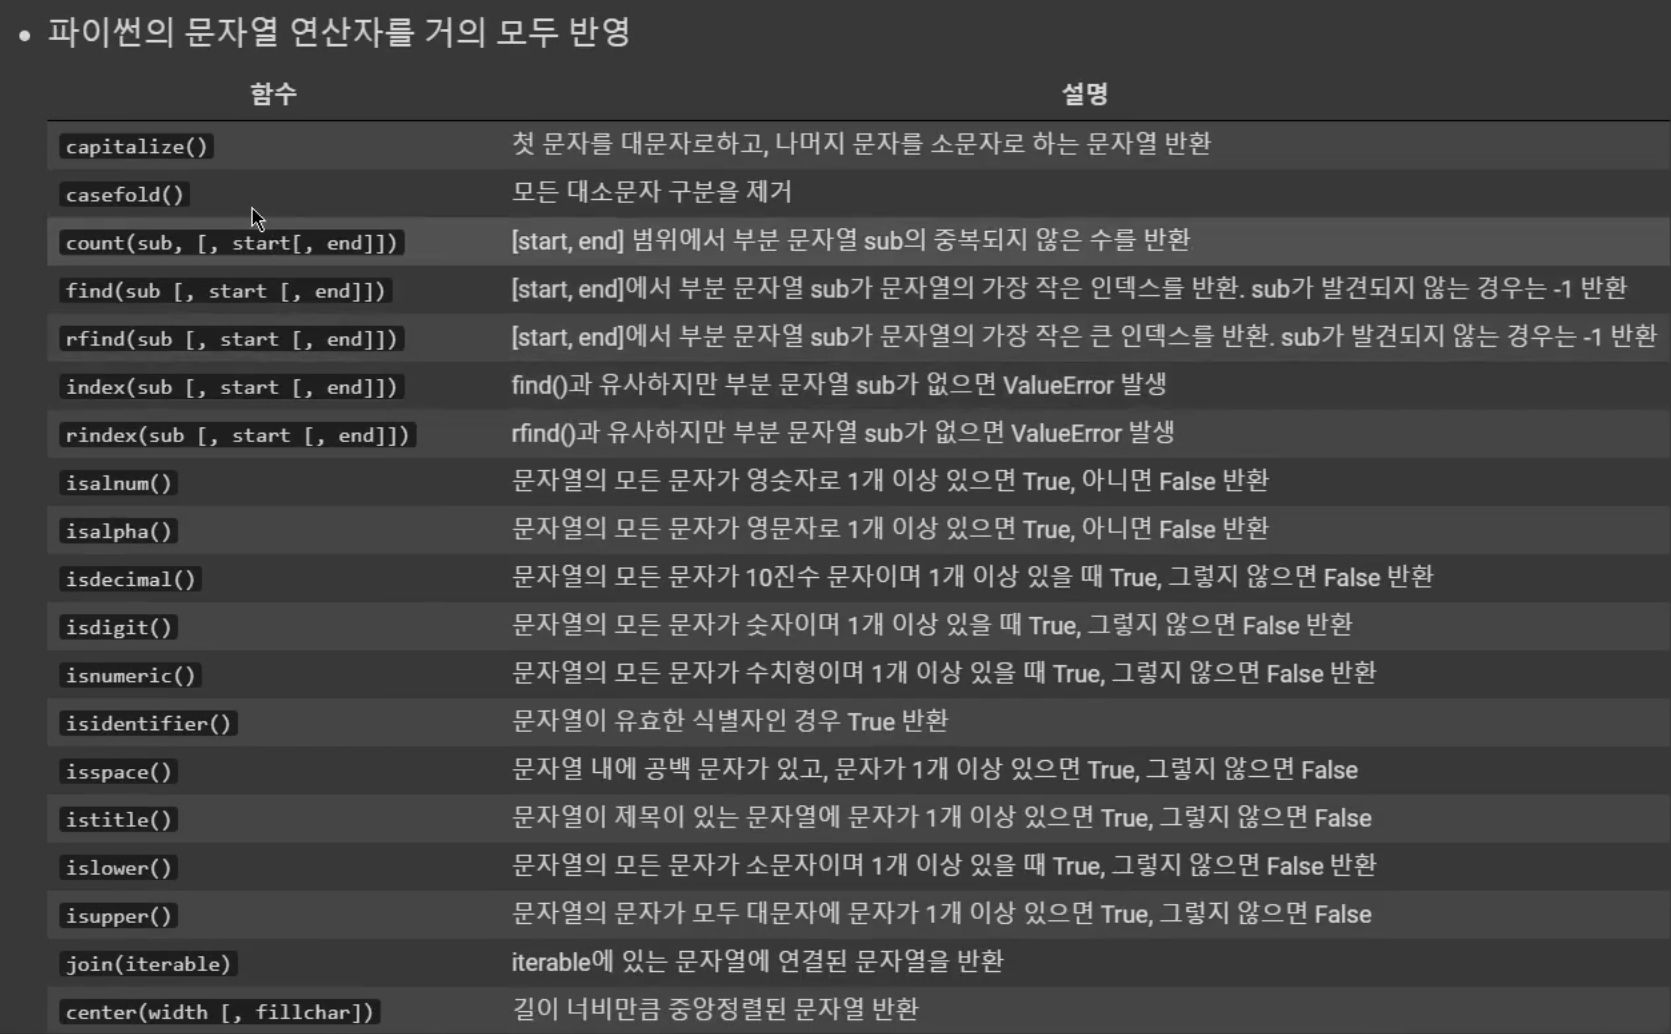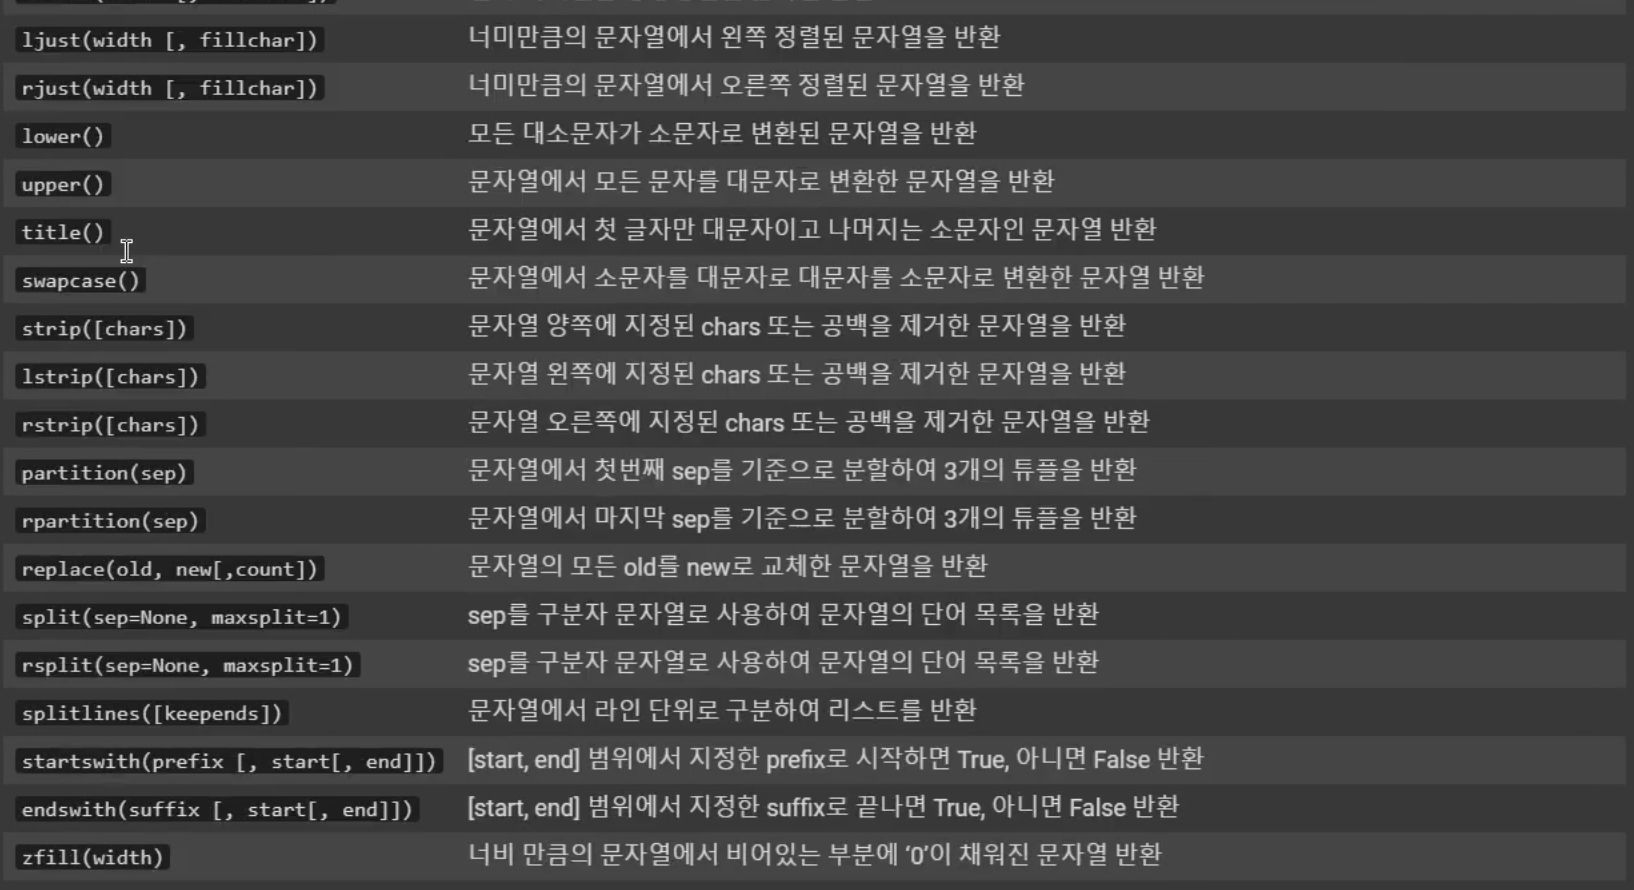
* 기존에 파이썬 문자열 연산자를 거의 모두 반영

In [ ]:
name_tuple = ('Jehyeon' , 'Elon musk' , 'Waren buffet' , None, 'Ray Dalio' , 'Paul to the jones')
names = pd.Series(name_tuple)
names

0              Jehyeon
1            Elon musk
2         Waren buffet
3                 None
4            Ray Dalio
5    Paul to the jones
dtype: object

In [ ]:
# 문자열 처리를 할 때는 str로 접근하면 된다.
## 판다스에서 문자열에 관해서 접근할 때는 전부 str로 하면 된대

names.str.lower()

0              jehyeon
1            elon musk
2         waren buffet
3                 None
4            ray dalio
5    paul to the jones
dtype: object

In [ ]:
names.str.len()

0     7.0
1     9.0
2    12.0
3     NaN
4     9.0
5    17.0
dtype: float64

In [ ]:
names.str.split()

0                 [jehyeon]
1              [elon, musk]
2           [waren, buffet]
3                      None
4              [Ray, Dalio]
5    [Paul, to, the, jones]
dtype: object

#### 기타 연산자

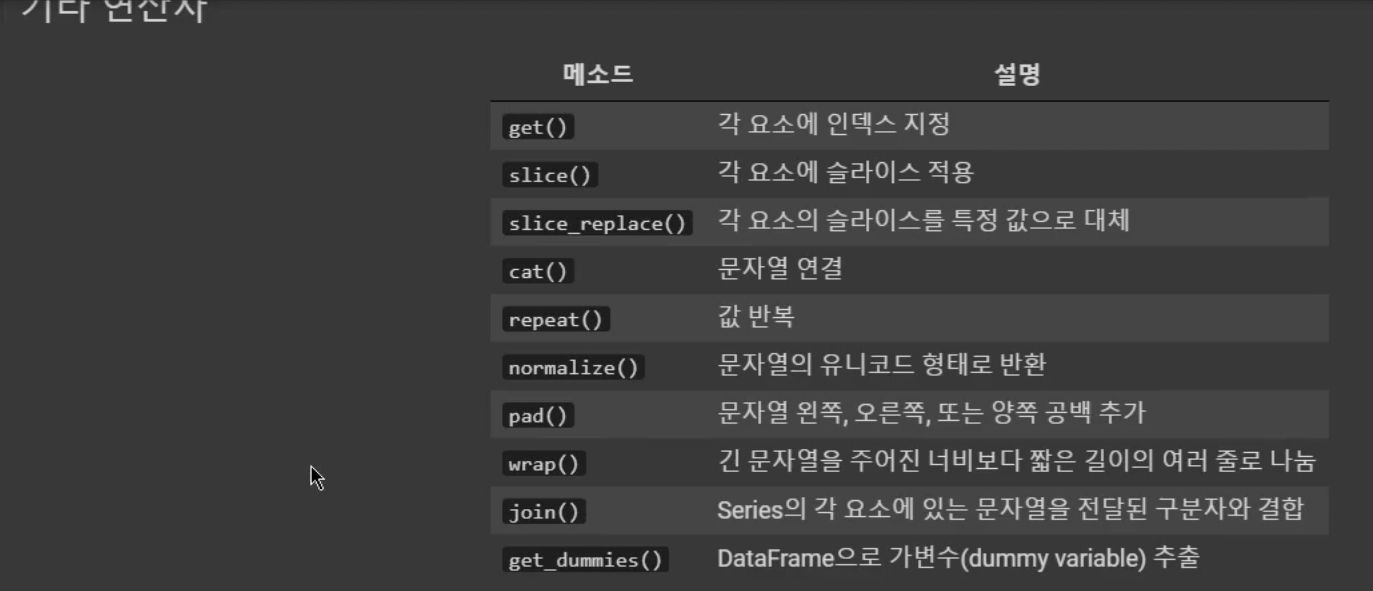


In [ ]:
# 문자열 자체를 기준으로 슬라이싱 한다.
## 문자의 3번째 자리까지 출력한다.

names.str[0:4]

0    Jehy
1    Elon
2    Ware
3    None
4    Ray 
5    Paul
dtype: object

In [ ]:
# 문자열과 관련된 처리를 할 때는 무조건 str로 접근 한다.
# 한번 str을 했더라도 다시한번 str을 적어준다.

names.str.split().str.get(-1)

0    jehyeon
1       musk
2     buffet
3       None
4      Dalio
5      jones
dtype: object

In [ ]:
names.str.repeat(2)

0                        jehyeonjehyeon
1                    elon muskelon musk
2              waren buffetwaren buffet
3                                  None
4                    Ray DalioRay Dalio
5    Paul to the jonesPaul to the jones
dtype: object

In [ ]:
names.str.join('*')

0                        j*e*h*y*e*o*n
1                    e*l*o*n* *m*u*s*k
2              w*a*r*e*n* *b*u*f*f*e*t
3                                 None
4                    R*a*y* *D*a*l*i*o
5    P*a*u*l* *t*o* *t*h*e* *j*o*n*e*s
dtype: object

#### 정규표현식

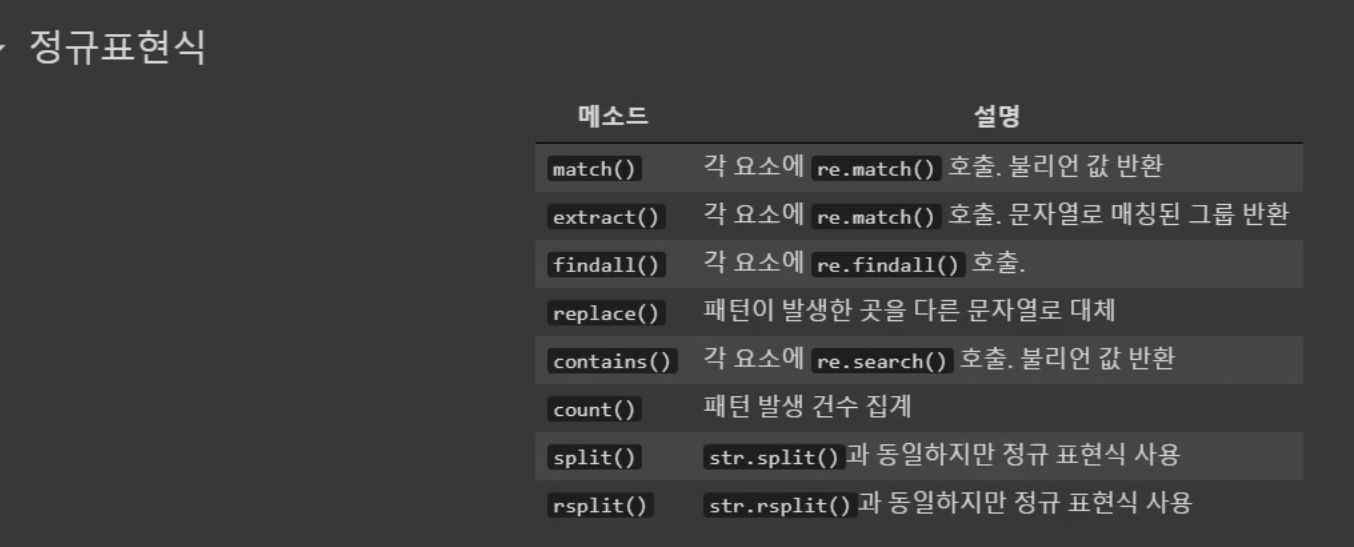


In [ ]:
names.str.match('([A-Za-z]+)')

0    True
1    True
2    True
3    None
4    True
5    True
dtype: object

In [ ]:
names.str.findall('([A-Za-z]+)' )

0                 [jehyeon]
1              [elon, musk]
2           [waren, buffet]
3                      None
4              [Ray, Dalio]
5    [Paul, to, the, jones]
dtype: object

## 시계열 처리

* 주식 가격 같은 시계열 데이터 처리에 강력한 도구를 제공한다

In [ ]:
# 날짜를 인덱스로 사용할 수 있다.
# DatetimeIndex를 사용한다. (데이트 타임 인덱스)

idx = pd.DatetimeIndex(['2019-01-01','2019-04-05', '2020-01-01' , '2021-10-01','2022-01-01'])
s = pd.Series([0,1,2,3,4], index = idx)
s

2019-01-01    0
2019-04-05    1
2020-01-01    2
2021-10-01    3
2022-01-01    4
dtype: int64

In [ ]:
# 20200101이후의 자료만 슬라이싱 해서 출력

## DatetimeIndex는 날짜로 자료를 슬라이싱하는 강력한 도구를 제공한다

s['2020-01-01':]

2020-01-01    2
2021-10-01    3
2022-01-01    4
dtype: int64

In [ ]:
# 2020-01-01 이전의 자료만 출력해줘

s[: '2020-01-01']

2019-01-01    0
2019-04-05    1
2020-01-01    2
dtype: int64

In [ ]:
# 2019년 자료를 전체 출력해줘
s['2019']

2019-01-01    0
2019-04-05    1
dtype: int64

#### 시계열 데이터 구조

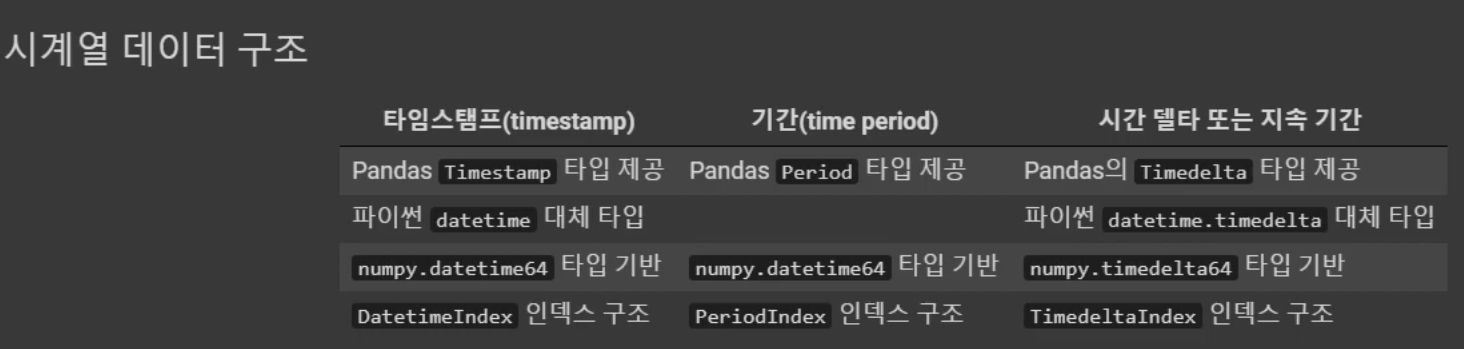


##### 여러 형식의 날짜를 인식하는 강력함

In [ ]:
# 다양하 날짜표현을 전부 표준으로 저장할 수 있다.
## 판다스에선 알아서 자료를 파악한다.

from datetime import datetime

dates = pd.to_datetime(['12-12-2019', datetime(2020, 10,10), '2nd of Feb, 2020',  '2020-Mar-4', '20200708'])
# 인덱스로 자도으로 저장이 되었다.
dates

DatetimeIndex(['2019-12-12', '2020-10-10', '2020-02-02', '2020-03-04',
               '2020-07-08'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates.to_period('D')

# 데이터 구조가 Period로 변경되었다. 즉 기간을 나타내는 구조로 바뀌었다.

PeriodIndex(['2019-12-12', '2020-10-10', '2020-02-02', '2020-03-04',
             '2020-07-08'],
            dtype='period[D]', freq='D')

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '303 days', '52 days', '83 days', '209 days'], dtype='timedelta64[ns]', freq=None)

##### date_range

In [ ]:
# date_range()를 사용해서 첫날, 마지막 날을 주어주고, 그 사이의 기간들을 인덱스로 구할 수 있다. 
## 디폴트 freq는 D이고 변경해 줄 수 있다.

pd.date_range('2021-01-01', '2021-07-01')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-06-22', '2021-06-23', '2021-06-24', '2021-06-25',
               '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29',
               '2021-06-30', '2021-07-01'],
              dtype='datetime64[ns]', length=182, freq='D')

In [ ]:
# period는 갯수를 의미한다.

pd.date_range('2020-01-01' , periods=7)

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2020-01-01' , periods=7, freq='M')

# 디폴트값인 freq는 D인데 M으로 설정을 했다.

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
pd.date_range('2020-01-01' , periods=7, freq='H')

# 디폴트값인 freq는 D인데 H으로 설정을 했다.

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='H')

##### None값의 처리

In [ ]:
# 시간데이터가 아닌 데이터를 저장하면 NaT라고 저장한다. 약간 NaN으로 저장하는 것과 유사하다

## None대신에 다른 문자열 자료를 입력했는데 오류가 뜨는 군. None값만 저장할 수 있는 듯

idx = pd.to_datetime(['2020-10-10 12:00:00', '2020-10-15 14:00:00']+ [None])
idx

DatetimeIndex(['2020-10-10 12:00:00', '2020-10-15 14:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [ ]:
idx[2]

NaT

In [ ]:
pd.isnull(idx)

array([False, False,  True])

### 시계열 기본

##### 시계열을 인덱스로 가지는 데이터 추출하기 (시리즈)

In [ ]:
# datetime()로 기본적인 날짜 데이터를 만들 수 있다.

dates = [datetime(2020 , 1, 1), datetime(2020,1,2) , datetime(2020,1,5), datetime(2020,1,6) , datetime(2020,1,7) ]
dates

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 5, 0, 0),
 datetime.datetime(2020, 1, 6, 0, 0),
 datetime.datetime(2020, 1, 7, 0, 0)]

In [ ]:
ts = pd.Series(np.random.rand(5), index = dates)
ts

2020-01-01    0.742317
2020-01-02    0.318278
2020-01-05    0.218912
2020-01-06    0.774300
2020-01-07    0.071224
dtype: float64

In [ ]:
ts.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-05', '2020-01-06',
               '2020-01-07'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
# datetime 형식으로 지정된 인덱스 추출하기

ts.index[0]

Timestamp('2020-01-01 00:00:00')

In [ ]:
# 인덱스가 datetime 형식인 시리즈의 값 출력하기

## 두 방식이 똑같은 값을 출력한다. 근데 두번째 방식이 더 직관적인데 왜 1번 방식으로 알려줬는지 모르겠다.(수안좌....)

print(ts[ts.index[2]])
print(ts[2])

0.21891196731273443
0.21891196731273443


In [ ]:
# datetime은 정말 강력하다. 날짜 형식에 구에받지않고 인덱싱할 수 있다.

print(ts['20200101'])
print(ts['1/1/2020'])

0.7423165514393436
0.7423165514393436


In [ ]:
# 인덱스를 날짜를 가지는 시리즈를 만들었다.

ts = pd.Series(np.random.randn(1000), index= pd.date_range('2018-01-01', periods = 1000))

ts

2018-01-01    1.336013
2018-01-02    1.885129
2018-01-03    1.369229
2018-01-04   -0.230410
2018-01-05    0.160057
                ...   
2020-09-22    0.793958
2020-09-23   -1.135398
2020-09-24    1.517834
2020-09-25    0.283503
2020-09-26   -0.912824
Freq: D, Length: 1000, dtype: float64

In [ ]:
#날짜 인덱스를 사용하면 강력한 점이 이것이다.
## 해당하는 년 or 달 의 정보를 전부 출력할 수 있다.

ts['2020']

2020-01-01    0.239225
2020-01-02   -0.056732
2020-01-03   -0.339747
2020-01-04    0.557665
2020-01-05    0.602638
                ...   
2020-09-22   -0.684434
2020-09-23    1.216153
2020-09-24   -0.771320
2020-09-25    1.047900
2020-09-26    1.435828
Freq: D, Length: 270, dtype: float64

In [ ]:
# 월별 인덱싱

ts['2020-06']

2020-06-01   -1.497357
2020-06-02   -0.912957
2020-06-03    1.777944
2020-06-04    0.956255
2020-06-05    1.754587
2020-06-06    0.818555
2020-06-07    1.949231
2020-06-08   -0.981088
2020-06-09   -0.187513
2020-06-10    0.447917
2020-06-11   -0.181758
2020-06-12    2.436533
2020-06-13    1.220805
2020-06-14   -1.551071
2020-06-15    1.478159
2020-06-16   -0.982933
2020-06-17    0.293706
2020-06-18   -1.208194
2020-06-19    0.490321
2020-06-20   -0.133019
2020-06-21   -1.241172
2020-06-22   -1.449420
2020-06-23   -0.558009
2020-06-24    0.988685
2020-06-25   -0.140478
2020-06-26   -0.451807
2020-06-27    0.198541
2020-06-28    0.358328
2020-06-29    0.292816
2020-06-30    1.726264
Freq: D, dtype: float64

In [ ]:
# 아래 두 방식은 똑같은 결과를 출력한다. 근데 왜 수안좌는 자꾸 어려운 것만 가르치는 거지??

print('a', ts[datetime(2020,9,23): ] )

print( 'b', ts['20200923':] )

a 2020-09-23   -1.135398
2020-09-24    1.517834
2020-09-25    0.283503
2020-09-26   -0.912824
Freq: D, dtype: float64
b 2020-09-23   -1.135398
2020-09-24    1.517834
2020-09-25    0.283503
2020-09-26   -0.912824
Freq: D, dtype: float64


In [ ]:
# 6월 20일 부터 7월 1일까지 추출하는 코드.
## 중간에 쉼표가 들어가지 않는 다는 것이 가장 중요하다.

ts['2020-06-20' : '2020-07-01']

2020-06-20    0.336368
2020-06-21   -0.627241
2020-06-22    0.588624
2020-06-23    0.269446
2020-06-24   -0.155139
2020-06-25   -0.806418
2020-06-26   -1.624035
2020-06-27    0.131352
2020-06-28    1.336239
2020-06-29   -1.767833
2020-06-30   -0.853652
2020-07-01   -0.928686
Freq: D, dtype: float64

##### 시계열을 인덱스로 가지는 데이터 추출하기 (데이터프레임)

In [ ]:
# 날짜를 인덱스로 가지는 데이터프레임 만들기
## 데이터프레임을 만드는 과정에서 인덱스를 시계열로 바로 줄 수도 있다.

tdf = pd.DataFrame(np.random.randn(1000,4), index=pd.date_range('2017-01-01', periods=1000), columns=['A', 'B','C','D'])
tdf

,A,B,C,D
2017-01-01,0.084073,0.087947,-1.353531,-0.092825
2017-01-02,1.028117,0.868522,0.511577,0.794001
2017-01-03,-0.543796,0.475457,-0.059934,0.434022
2017-01-04,0.114171,-0.297386,-2.433381,-0.004750
2017-01-05,0.385396,-0.916992,0.389256,1.017012
...,...,...,...,...
2019-09-23,-0.705273,-0.012569,-1.666790,-0.373000
2019-09-24,-0.118497,-0.073740,-0.021483,-0.263855
2019-09-25,-0.025448,-0.951764,-0.832691,0.167923
2019-09-26,0.963596,0.140201,-1.861003,-0.562290


In [ ]:
tdf['2019']

,A,B,C,D
2019-01-01,-2.358008,2.316941,0.858372,0.614650
2019-01-02,-0.325030,-1.098068,-1.331178,-1.050461
2019-01-03,0.767533,1.604123,-0.099384,-2.510901
2019-01-04,0.401988,-0.380644,0.422787,0.888513
2019-01-05,0.763551,-0.159695,-0.069764,-0.451579
...,...,...,...,...
2019-09-23,-1.157579,0.015253,0.882276,-0.642935
2019-09-24,-0.103207,-0.994506,-1.741882,0.775891
2019-09-25,0.360807,0.245975,1.181164,1.472055
2019-09-26,-1.363160,0.032252,0.286011,0.474453


In [ ]:
# 셋의 결과는 똑같다. 뭐 당연하지.

tdf.loc['2019-06']
tdf['2019-06']
tdf['20190601' : '20190630']

,A,B,C,D
2019-06-01,-0.355031,0.535502,0.627461,1.772368
2019-06-02,1.300803,-1.806470,0.133299,-1.560466
2019-06-03,-0.590252,0.572422,-0.268473,1.949019
2019-06-04,0.835528,-0.373339,-0.411008,0.654971
2019-06-05,-0.672981,-0.168767,1.579056,-0.079315
2019-06-06,1.598164,0.032944,-0.511760,0.832394
2019-06-07,-0.510855,0.169474,0.185409,0.637953
2019-06-08,-1.273761,1.457121,-1.580874,-0.914270
2019-06-09,-0.302040,1.182105,0.399129,0.424947
2019-06-10,0.590865,1.162774,-0.279324,0.406236


In [ ]:
tdf['2019-06-15' :]

,A,B,C,D
2019-06-15,-1.209295,-0.844377,-0.908779,0.768659
2019-06-16,0.409334,-0.351445,0.257183,0.786473
2019-06-17,-0.791335,-0.455150,-0.753158,-0.362687
2019-06-18,-1.653038,-0.606914,1.061498,-0.373667
2019-06-19,0.190472,-1.295341,1.873033,-1.325748
...,...,...,...,...
2019-09-23,-1.157579,0.015253,0.882276,-0.642935
2019-09-24,-0.103207,-0.994506,-1.741882,0.775891
2019-09-25,0.360807,0.245975,1.181164,1.472055
2019-09-26,-1.363160,0.032252,0.286011,0.474453


In [ ]:
tdf['C']

2017-01-01   -0.233969
2017-01-02    1.391295
2017-01-03   -0.450562
2017-01-04   -0.463170
2017-01-05    1.248694
                ...   
2019-09-23    0.882276
2019-09-24   -1.741882
2019-09-25    1.181164
2019-09-26    0.286011
2019-09-27   -1.004970
Freq: D, Name: C, Length: 1000, dtype: float64

##### 중복되는 시계열이 있는 데이터 처리하기

In [ ]:
# 중복이 포함된 시계열데이터 만들기
## 이번형식의 경우엔 인덱스에 DatetimeIndex를 사용해서 바로 인덱스를 날짜로 지정해주는 형태를 사용했다.

ts = pd.Series(np.random.randn(4), index=pd.DatetimeIndex(['2020-01-01','2020-01-02' , '2020-05-05' , '2020-05-05']))
ts

2020-01-01    1.991736
2020-01-02   -0.433503
2020-05-05   -0.836370
2020-05-05   -0.508473
dtype: float64

In [ ]:
ts.index.is_unique

# 인덱스 값이 유니크하지 않기 때문에 false가 뜬다.

False

In [ ]:
ts['2020-05-05']

# 중복된 값이 전부 출력된다.

2020-05-05   -0.827169
2020-05-05   -0.007033
dtype: float64

In [ ]:
# 중복되는 시계열 데이터가 있을 때는 groupby를 사용한다고 한다.

ts.groupby(level= 0).mean()

# 1월1일 데이터는 두개가 있기 때문에 그 사이의 평균을 계산하도록 한 것이다.

2020-01-01    1.991736
2020-01-02   -0.433503
2020-05-05   -0.672421
dtype: float64

In [ ]:
# date_range 사용해서 범위로 시계열 인덱스 만들어 주기

pd.date_range('2020-01-01' , '2020-07-01')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
               '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=183, freq='D')

In [ ]:
# date_range를 사용해서 시작지점과 거기서 부터의 period도 설정해 줄 수 있다.

## freq를 조절하면 시간이나 일, 달으로도 바꿀 수 있을 듯

pd.date_range(start = '2020-01-01' , periods= 10, freq= '6D')

DatetimeIndex(['2020-01-01', '2020-01-07', '2020-01-13', '2020-01-19',
               '2020-01-25', '2020-01-31', '2020-02-06', '2020-02-12',
               '2020-02-18', '2020-02-24'],
              dtype='datetime64[ns]', freq='6D')

In [ ]:
# end= 를 사용해서 끝나는 지점을 선택해 줄 수 있다.

pd.date_range(end='2020-01-01' , periods= 10, freq= '6D')

DatetimeIndex(['2019-11-08', '2019-11-14', '2019-11-20', '2019-11-26',
               '2019-12-02', '2019-12-08', '2019-12-14', '2019-12-20',
               '2019-12-26', '2020-01-01'],
              dtype='datetime64[ns]', freq='6D')

In [ ]:
# 영업일만 출력한다

pd.date_range('2020-01-01' , '2020-07-01', freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14',
               ...
               '2020-06-18', '2020-06-19', '2020-06-22', '2020-06-23',
               '2020-06-24', '2020-06-25', '2020-06-26', '2020-06-29',
               '2020-06-30', '2020-07-01'],
              dtype='datetime64[ns]', length=131, freq='B')

### 주기와 오프셋

* freq에 어떤 값을 주냐에 따라서 알아서 처리 해준다


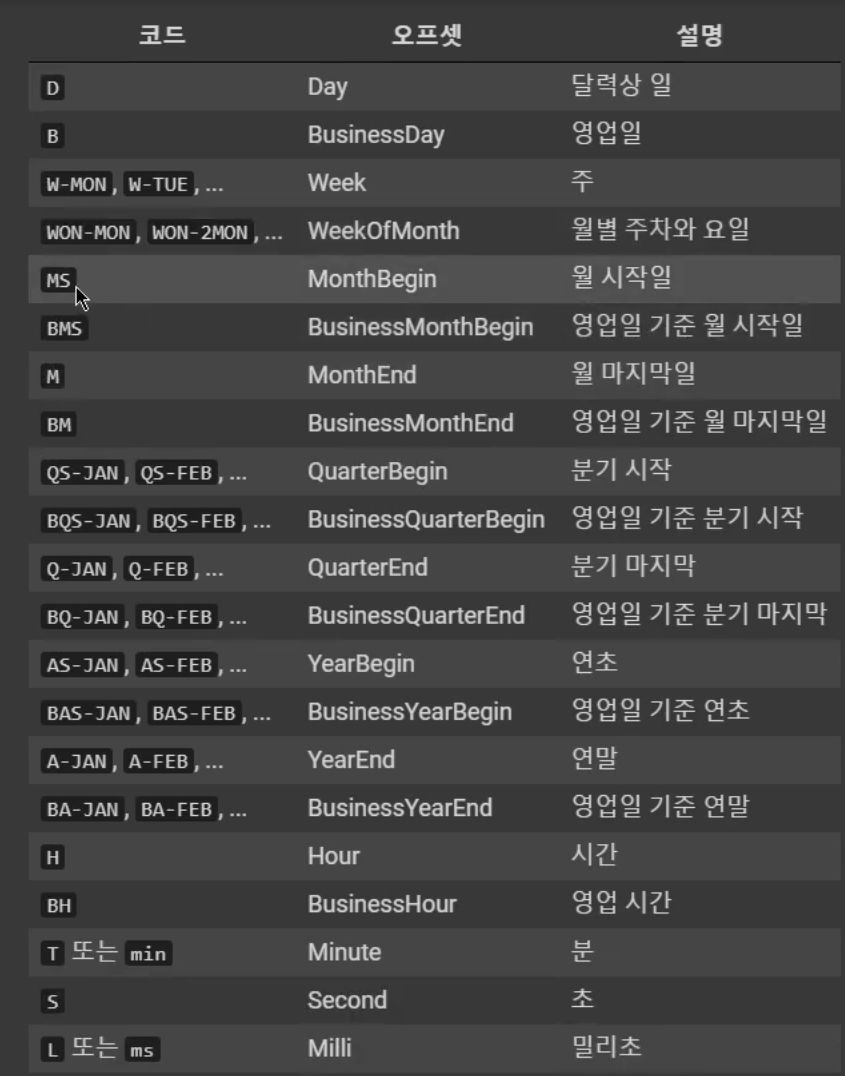


In [ ]:
# H: 시간

pd.timedelta_range(0, periods=12, freq='H')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00', '0 days 10:00:00', '0 days 11:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [ ]:
# T분( T가 햇갈리면, min을 사용해도 된다.)

pd.timedelta_range(0, periods= 60, freq= 'T')

TimedeltaIndex(['0 days 00:00:00', '0 days 00:01:00', '0 days 00:02:00',
                '0 days 00:03:00', '0 days 00:04:00', '0 days 00:05:00',
                '0 days 00:06:00', '0 days 00:07:00', '0 days 00:08:00',
                '0 days 00:09:00', '0 days 00:10:00', '0 days 00:11:00',
                '0 days 00:12:00', '0 days 00:13:00', '0 days 00:14:00',
                '0 days 00:15:00', '0 days 00:16:00', '0 days 00:17:00',
                '0 days 00:18:00', '0 days 00:19:00', '0 days 00:20:00',
                '0 days 00:21:00', '0 days 00:22:00', '0 days 00:23:00',
                '0 days 00:24:00', '0 days 00:25:00', '0 days 00:26:00',
                '0 days 00:27:00', '0 days 00:28:00', '0 days 00:29:00',
                '0 days 00:30:00', '0 days 00:31:00', '0 days 00:32:00',
                '0 days 00:33:00', '0 days 00:34:00', '0 days 00:35:00',
                '0 days 00:36:00', '0 days 00:37:00', '0 days 00:38:00',
                '0 days 00:39:00', '0 days 00:40:00

In [ ]:
pd.timedelta_range(0, periods= 20, freq= '1H30T')

TimedeltaIndex(['0 days 00:00:00', '0 days 01:30:00', '0 days 03:00:00',
                '0 days 04:30:00', '0 days 06:00:00', '0 days 07:30:00',
                '0 days 09:00:00', '0 days 10:30:00', '0 days 12:00:00',
                '0 days 13:30:00', '0 days 15:00:00', '0 days 16:30:00',
                '0 days 18:00:00', '0 days 19:30:00', '0 days 21:00:00',
                '0 days 22:30:00', '1 days 00:00:00', '1 days 01:30:00',
                '1 days 03:00:00', '1 days 04:30:00'],
               dtype='timedelta64[ns]', freq='90T')

In [ ]:
pd.date_range('2020-01-01' , periods = 20, freq = 'B')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-20', '2020-01-21', '2020-01-22',
               '2020-01-23', '2020-01-24', '2020-01-27', '2020-01-28'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
pd.date_range('2020-01-01' , periods = 30, freq = '2H')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00',
               '2020-01-01 08:00:00', '2020-01-01 10:00:00',
               '2020-01-01 12:00:00', '2020-01-01 14:00:00',
               '2020-01-01 16:00:00', '2020-01-01 18:00:00',
               '2020-01-01 20:00:00', '2020-01-01 22:00:00',
               '2020-01-02 00:00:00', '2020-01-02 02:00:00',
               '2020-01-02 04:00:00', '2020-01-02 06:00:00',
               '2020-01-02 08:00:00', '2020-01-02 10:00:00',
               '2020-01-02 12:00:00', '2020-01-02 14:00:00',
               '2020-01-02 16:00:00', '2020-01-02 18:00:00',
               '2020-01-02 20:00:00', '2020-01-02 22:00:00',
               '2020-01-03 00:00:00', '2020-01-03 02:00:00',
               '2020-01-03 04:00:00', '2020-01-03 06:00:00',
               '2020-01-03 08:00:00', '2020-01-03 10:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [ ]:
pd.date_range('2020-01-01' , periods = 10 , freq= 'S')

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:00:01',
               '2020-01-01 00:00:02', '2020-01-01 00:00:03',
               '2020-01-01 00:00:04', '2020-01-01 00:00:05',
               '2020-01-01 00:00:06', '2020-01-01 00:00:07',
               '2020-01-01 00:00:08', '2020-01-01 00:00:09'],
              dtype='datetime64[ns]', freq='S')

### 시프트(Shift)

* 시계열데이터를 처리할 때 shift를 자주사용한다고 함

In [ ]:
# 한 가지 팁이면서 당연한 것은, randn을 5로 했기 때문에 period도 5여야 한다는 것이다.

ts = pd.Series(np.random.randn(5) , 
               index= pd.date_range('2020-01-01' , periods = 5 , freq = 'B'))
ts

2020-01-01   -1.136207
2020-01-02    0.623936
2020-01-03   -0.462391
2020-01-06   -0.467429
2020-01-07   -1.043021
Freq: B, dtype: float64

In [ ]:
# shift는 값을 이동시킨다.
## 아래로 미는 군

ts.shift(1)

2020-01-01         NaN
2020-01-02   -0.785761
2020-01-03    0.744125
2020-01-06    0.803983
2020-01-07   -0.980705
Freq: B, dtype: float64

In [ ]:
ts.shift(3)

2020-01-01         NaN
2020-01-02         NaN
2020-01-03         NaN
2020-01-06   -0.785761
2020-01-07    0.744125
Freq: B, dtype: float64

In [ ]:
ts.shift(-1)

2020-01-01    0.744125
2020-01-02    0.803983
2020-01-03   -0.980705
2020-01-06   -0.750071
2020-01-07         NaN
Freq: B, dtype: float64

In [ ]:
# 이게 진짜 중요한 듯.
## 그냥 shift를 사용하면 인덱스는 그대로 두고, 값만 shift 했지만,
## freq를 주어주니 값과 인덱스(날짜) 전부 shift 되었다.

ts.shift(3, freq = 'B')

2020-01-01   -1.136207
2020-01-02    0.623936
2020-01-03   -0.462391
2020-01-06   -0.467429
2020-01-07   -1.043021
Freq: B, dtype: float64


2020-01-06   -1.136207
2020-01-07    0.623936
2020-01-08   -0.462391
2020-01-09   -0.467429
2020-01-10   -1.043021
Freq: B, dtype: float64

In [ ]:
ts.shift(2, freq = 'W')

2020-01-12   -0.785761
2020-01-12    0.744125
2020-01-12    0.803983
2020-01-19   -0.980705
2020-01-19   -0.750071
dtype: float64

### 시간대 처리

* 국제표준시(Coordinated Universal Time, UTC)를 기준으로 떨어진 거리만큼 오프셋으로 시간대 처리
* 전 세계의 시간대 정보를 모아놓은 올슨 데이터베이스를 활용한 라이브러리인 `pytz` 사용

In [ ]:
import pytz
pytz.common_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'America/Adak', 'America/Anchorage', 'Amer

In [ ]:
tz = pytz.timezone('Asia/Seoul')

# 이렇게 하면 tz(타임존)이 서울이 된다

In [ ]:
# date_range는 인덱스를 만드는 것이다!!

dinx = pd.date_range('2020-01-01 09:00' , periods = 7, freq='B')

ts = pd.Series(np.random.randn(len(dinx)), index = dinx)
ts

2020-01-01 09:00:00   -0.012335
2020-01-02 09:00:00   -0.588793
2020-01-03 09:00:00   -0.996103
2020-01-06 09:00:00   -1.328248
2020-01-07 09:00:00   -0.931098
2020-01-08 09:00:00   -0.380958
2020-01-09 09:00:00   -0.161207
Freq: B, dtype: float64

In [ ]:
# 표준시는 오프셋이 0이다. (플러스 되는게 없다)

pd.date_range('2020-01-01' , periods=7, freq= 'B' , tz= 'UTC')

DatetimeIndex(['2020-01-01 00:00:00+00:00', '2020-01-02 00:00:00+00:00',
               '2020-01-03 00:00:00+00:00', '2020-01-06 00:00:00+00:00',
               '2020-01-07 00:00:00+00:00', '2020-01-08 00:00:00+00:00',
               '2020-01-09 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
ts_utc = ts.tz_localize('UTC')
ts_utc

# 처음부터
# pd.data_range('2020-01-01' , periods=7, freq='B', tz='UTC')
# 이렇게 해도 되는데 왜 위 처럼 가르쳤을까?

2020-01-01 09:00:00+00:00   -0.909461
2020-01-02 09:00:00+00:00    0.891645
2020-01-03 09:00:00+00:00   -0.527679
2020-01-06 09:00:00+00:00    1.056973
2020-01-07 09:00:00+00:00   -0.366628
2020-01-08 09:00:00+00:00    0.656004
2020-01-09 09:00:00+00:00    0.495738
Freq: B, dtype: float64

In [ ]:
ts_utc.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [ ]:
# UTC에서 시간대를 바꿀 수 있다. tz_convert를 사용하면 됨

ts_utc.tz_convert('Asia/Seoul')

2020-01-01 18:00:00+09:00   -0.909461
2020-01-02 18:00:00+09:00    0.891645
2020-01-03 18:00:00+09:00   -0.527679
2020-01-06 18:00:00+09:00    1.056973
2020-01-07 18:00:00+09:00   -0.366628
2020-01-08 18:00:00+09:00    0.656004
2020-01-09 18:00:00+09:00    0.495738
Freq: B, dtype: float64

In [ ]:
ts_seoul = ts.tz_localize('Asia/Seoul')
ts_seoul

# 이것도 처음에 ts를 만들 때 tz='Asia/Seoul'을 지정해 주면 되는 것 아닌가?

2020-01-01 09:00:00+09:00   -0.909461
2020-01-02 09:00:00+09:00    0.891645
2020-01-03 09:00:00+09:00   -0.527679
2020-01-06 09:00:00+09:00    1.056973
2020-01-07 09:00:00+09:00   -0.366628
2020-01-08 09:00:00+09:00    0.656004
2020-01-09 09:00:00+09:00    0.495738
dtype: float64

In [ ]:
# tz_convert를 이용해서 시간을 바꿀 수 있다.

ts_seoul.tz_convert('UTC')

2020-01-01 00:00:00+00:00   -0.909461
2020-01-02 00:00:00+00:00    0.891645
2020-01-03 00:00:00+00:00   -0.527679
2020-01-06 00:00:00+00:00    1.056973
2020-01-07 00:00:00+00:00   -0.366628
2020-01-08 00:00:00+00:00    0.656004
2020-01-09 00:00:00+00:00    0.495738
dtype: float64

In [ ]:
ts_seoul.tz_convert('Europe/Paris')

2020-01-01 01:00:00+01:00   -0.909461
2020-01-02 01:00:00+01:00    0.891645
2020-01-03 01:00:00+01:00   -0.527679
2020-01-06 01:00:00+01:00    1.056973
2020-01-07 01:00:00+01:00   -0.366628
2020-01-08 01:00:00+01:00    0.656004
2020-01-09 01:00:00+01:00    0.495738
dtype: float64

In [ ]:
ts.index.tz_localize('America/New_York')

DatetimeIndex(['2020-01-01 09:00:00-05:00', '2020-01-02 09:00:00-05:00',
               '2020-01-03 09:00:00-05:00', '2020-01-06 09:00:00-05:00',
               '2020-01-07 09:00:00-05:00', '2020-01-08 09:00:00-05:00',
               '2020-01-09 09:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00')
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

# 이것도 처음에 stamp를 만들 때 
# pd.Timestamp('2020-01-01 12:00', tz='UTC') 로 하면 한번에 만들 수 있다. 

Timestamp('2020-01-01 12:00:00+0000', tz='UTC')

In [ ]:
stamp_utc.value

1577880000000000000

In [ ]:
# stamp_utc의 UTC 기준 시간을 서울기준의 시간으로 변경했다.

stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2020-01-01 21:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp_utc.tz_convert('Asia/Seoul').value

1577880000000000000

In [ ]:
# 아까 내가 위에서 말한 방식으로 한큐에 만드는 군.

stamp_ny = pd.Timestamp('2020-01-01' , tz = 'America/New_York')
stamp_ny

Timestamp('2020-01-01 00:00:00-0500', tz='America/New_York')

In [ ]:
stamp_utc.value

1577880000000000000

In [ ]:
stamp_ny.value

# timezone 다르기 때문에 utc와 ny의 value 값 차이가 나타난다.

1577854800000000000

In [ ]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2020-01-01 20:00:00+0800', tz='Asia/Shanghai')

In [ ]:
stamp = pd.Timestamp('2020-01-01 12:00', tz = 'Asia/Seoul')
stamp

Timestamp('2020-01-01 12:00:00+0900', tz='Asia/Seoul')

In [ ]:
# offsets 사용을 위해서 새로운 것을 import 해와야한다.

from pandas.tseries.offsets import Hour

stamp + Hour()

# 원래 stamp는 12시였는데, Hour()을 더해서, 13시가 되었다.

Timestamp('2020-01-01 13:00:00+0900', tz='Asia/Seoul')

In [ ]:
stamp + 3 * Hour()

Timestamp('2020-01-01 15:00:00+0900', tz='Asia/Seoul')

In [ ]:
ts_utc

2020-01-01 09:00:00+00:00   -0.909461
2020-01-02 09:00:00+00:00    0.891645
2020-01-03 09:00:00+00:00   -0.527679
2020-01-06 09:00:00+00:00    1.056973
2020-01-07 09:00:00+00:00   -0.366628
2020-01-08 09:00:00+00:00    0.656004
2020-01-09 09:00:00+00:00    0.495738
Freq: B, dtype: float64

In [ ]:
# 다른 timezone을 가지는 인덱스의 연산

ts1 = ts_utc[:5].tz_convert('Europe/Berlin')
ts2 = ts_utc[2:].tz_convert('America/New_York')

ts = ts1 + ts2

In [ ]:
# 다른 timezone을 가지고 있다고 해도, 결국 UTC로 바꿔서 출력한다.

ts.index

DatetimeIndex(['2020-01-01 09:00:00+00:00', '2020-01-02 09:00:00+00:00',
               '2020-01-03 09:00:00+00:00', '2020-01-06 09:00:00+00:00',
               '2020-01-07 09:00:00+00:00', '2020-01-08 09:00:00+00:00',
               '2020-01-09 09:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

### 기간과 기간 연산

In [ ]:
# A-JAN은 연말을 의미한다.

p = pd.Period(2020, freq = 'A-JAN')
p

Period('2020', 'A-JAN')

In [ ]:
p + 2

Period('2022', 'A-JAN')

In [ ]:
p - 3

Period('2017', 'A-JAN')

In [ ]:
p1 = pd.Period(2010, freq= 'A-JAN')
p2 = pd.Period(2020, freq= "A-JAN")

p2- p1

<10 * YearEnds: month=1>

In [ ]:
pr = pd.period_range('2020-01-01', '2020-06-30', freq = 'M')
pr

PeriodIndex(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06'], dtype='period[M]', freq='M')

In [ ]:
# 위에서 peroid_range로 만들어 둔 pr을 인덱스로 바로 가져다 주면 된다.

pd.Series(np.random.randn(6), index=pr)

2020-01    0.739519
2020-02    0.659007
2020-03    1.011057
2020-04    0.156293
2020-05   -0.231012
2020-06    0.357518
Freq: M, dtype: float64

In [ ]:
pidx = pd.PeriodIndex(['2020-1' ,'2020-2','2020-4'], freq='M')
pidx

PeriodIndex(['2020-01', '2020-02', '2020-04'], dtype='period[M]', freq='M')

In [ ]:
p = pd.Period('2020' , freq='A-FEB')
p

# 2020년 2월을 연말로 주는 것인가?

Period('2020', 'A-FEB')

In [ ]:
p.asfreq('M', how='start')

Period('2019-03', 'M')

In [ ]:
p.asfreq('M' , how='end')

Period('2020-02', 'M')

In [ ]:
p = pd.Period('2020' , freq='A-OCT')
p

# 20년 10월이 연말이 되는 것인가..

Period('2020', 'A-OCT')

In [ ]:
p.asfreq('M' , how='start')

Period('2019-11', 'M')

In [ ]:
p.asfreq('M', how='end')

Period('2020-10', 'M')

In [ ]:
pr = pd.period_range('2010' , '2020', freq = 'A-JAN')
ts = pd.Series(np.random.randn(len(pr)), index=pr)
ts

2010    1.082855
2011   -1.435848
2012   -0.396994
2013    0.468545
2014   -0.167242
2015   -2.140452
2016   -0.664053
2017   -1.077280
2018    0.488460
2019   -0.554217
2020    0.611524
Freq: A-JAN, dtype: float64

In [ ]:
ts.asfreq('M', how='start')

2009-02    1.082855
2010-02   -1.435848
2011-02   -0.396994
2012-02    0.468545
2013-02   -0.167242
2014-02   -2.140452
2015-02   -0.664053
2016-02   -1.077280
2017-02    0.488460
2018-02   -0.554217
2019-02    0.611524
Freq: M, dtype: float64

In [ ]:
ts.asfreq('B', how='end')

2010-01-29    1.082855
2011-01-31   -1.435848
2012-01-31   -0.396994
2013-01-31    0.468545
2014-01-31   -0.167242
2015-01-30   -2.140452
2016-01-29   -0.664053
2017-01-31   -1.077280
2018-01-31    0.488460
2019-01-31   -0.554217
2020-01-31    0.611524
Freq: B, dtype: float64

In [ ]:
p = pd.Period('2020Q2' , freq='Q-JAN')
p

Period('2020Q2', 'Q-JAN')

In [ ]:
p.asfreq('D' , 'start')

Period('2019-05-01', 'D')

In [ ]:
p.asfreq('D' , 'end')

Period('2019-07-31', 'D')

In [ ]:
pr = pd.period_range('2020Q3' , '2020Q4' , freq='Q-JAN')
ts = pd.Series(np.arange(len(pr)), index=pr)
ts

2020Q3    0
2020Q4    1
Freq: Q-JAN, dtype: int64

In [ ]:
pr = pd.date_range('2020-01-01' , periods=5 , freq='Q-JAN')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-31   -0.453983
2020-04-30   -0.254853
2020-07-31    0.236152
2020-10-31    0.617332
2021-01-31    1.601963
Freq: Q-JAN, dtype: float64

In [ ]:
ts.to_period()

2020Q4   -0.453983
2021Q1   -0.254853
2021Q2    0.236152
2021Q3    0.617332
2021Q4    1.601963
Freq: Q-JAN, dtype: float64

In [ ]:
pr = pd.date_range('2020-01-01' , periods=5, freq='D')
ts = pd.Series(np.random.randn(5), index=pr)
ts

2020-01-01   -1.242607
2020-01-02   -0.332547
2020-01-03   -1.224960
2020-01-04    1.640379
2020-01-05   -0.921600
Freq: D, dtype: float64

In [ ]:
p = ts.to_period('M')
p

2020-01   -1.242607
2020-01   -0.332547
2020-01   -1.224960
2020-01    1.640379
2020-01   -0.921600
Freq: M, dtype: float64

In [ ]:
p.to_timestamp(how='start')

2020-01-01   -1.242607
2020-01-01   -0.332547
2020-01-01   -1.224960
2020-01-01    1.640379
2020-01-01   -0.921600
dtype: float64

### 리샘플링(Resampling)

* 리샘플링(Resampling): 시계열의 빈도(freq) 변환
* 다운샘플링(Down sampling): 상위 빈도 데이터를 하위 빈도 데이터로 집계
* 업샘플링(Up sampling): 하위 빈도 데이터를 상위 빈도 데이터로 집계

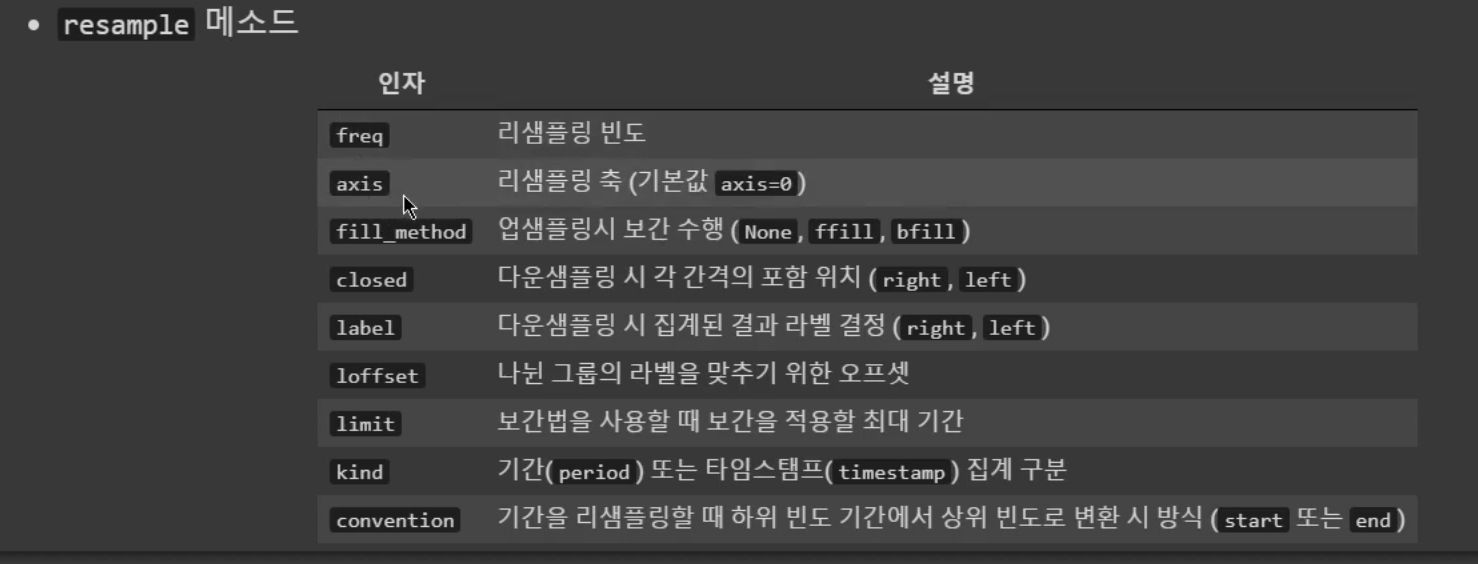

##### 시리즈 리샘플링

In [ ]:
dr = pd.date_range('2020-01-01' , periods =200 , freq = 'D')
ts = pd.Series(np.random.randn(len(dr)), index=dr)
ts

2020-01-01   -0.091393
2020-01-02    1.275545
2020-01-03   -0.944263
2020-01-04    0.296731
2020-01-05   -0.725520
                ...   
2020-07-14    0.209923
2020-07-15    1.089659
2020-07-16   -0.994815
2020-07-17    1.186991
2020-07-18    0.911391
Freq: D, Length: 200, dtype: float64

In [ ]:
# D에서 M으로 위(상위)로 집계하는 것이다.

ts.resample('M').mean()

2020-01-31    0.211795
2020-02-29   -0.149418
2020-03-31    0.222220
2020-04-30    0.302130
2020-05-31   -0.213695
2020-06-30   -0.053066
2020-07-31    0.155933
Freq: M, dtype: float64

In [ ]:
ts.resample('M', kind='period').mean()

2020-01    0.034505
2020-02   -0.137703
2020-03   -0.122880
2020-04   -0.217000
2020-05   -0.340739
2020-06    0.138845
2020-07   -0.148733
Freq: M, dtype: float64

In [ ]:
dr = pd.date_range('2020-01-01', periods=10, freq='T')
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64

In [ ]:
# 기존 1분 단위를 2분 단위로 바꾸었다. 

print(ts.resample('2T', closed= 'left').sum())
print(ts.resample('2T', closed= 'right').sum())

2020-01-01 00:00:00     1
2020-01-01 00:02:00     5
2020-01-01 00:04:00     9
2020-01-01 00:06:00    13
2020-01-01 00:08:00    17
Freq: 2T, dtype: int64
2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64


In [ ]:
ts.resample('2T', closed= 'right').sum()

2019-12-31 23:58:00     0
2020-01-01 00:00:00     3
2020-01-01 00:02:00     7
2020-01-01 00:04:00    11
2020-01-01 00:06:00    15
2020-01-01 00:08:00     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed= 'right', label = 'right').sum()

2020-01-01 00:00:00     0
2020-01-01 00:02:00     3
2020-01-01 00:04:00     7
2020-01-01 00:06:00    11
2020-01-01 00:08:00    15
2020-01-01 00:10:00     9
Freq: 2T, dtype: int64

In [ ]:
ts.resample('2T', closed= 'right', label = 'right', loffset='-1s').sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  """Entry point for launching an IPython kernel.


2019-12-31 23:59:59     0
2020-01-01 00:01:59     3
2020-01-01 00:03:59     7
2020-01-01 00:05:59    11
2020-01-01 00:07:59    15
2020-01-01 00:09:59     9
Freq: 2T, dtype: int64

In [ ]:
# 주식에서 ohlc 매소드
print(ts)

ts.resample('2T').ohlc()

# 시가 고가 저가 종가

2020-01-01 00:00:00    0
2020-01-01 00:01:00    1
2020-01-01 00:02:00    2
2020-01-01 00:03:00    3
2020-01-01 00:04:00    4
2020-01-01 00:05:00    5
2020-01-01 00:06:00    6
2020-01-01 00:07:00    7
2020-01-01 00:08:00    8
2020-01-01 00:09:00    9
Freq: T, dtype: int64


,open,high,low,close
2020-01-01 00:00:00,0,1,0,1
2020-01-01 00:02:00,2,3,2,3
2020-01-01 00:04:00,4,5,4,5
2020-01-01 00:06:00,6,7,6,7
2020-01-01 00:08:00,8,9,8,9


##### 데이터후레임 리샘플링

* 강의에서 배운 것 처럼 resample을 사용해도 되고,
* 그냥 데이터프레임에 바로 asfreq()를 사용해줘도 된다.

In [ ]:
df = pd.DataFrame(np.random.randn(10,4), index=pd.date_range('2019-10-01' , periods=10, freq='M'),
                  columns=(['c1','c2', 'c3','c4']))

df

,c1,c2,c3,c4
2019-10-31,-1.016036,0.745320,1.740303,0.561494
2019-11-30,-0.295420,-2.498862,-1.116390,1.246125
2019-12-31,-0.231226,-1.548955,-0.521347,-0.060913
2020-01-31,2.387723,-0.726002,-0.502657,1.642673
2020-02-29,0.712223,0.153213,-1.115099,1.961096
2020-03-31,-1.991775,-0.920152,-1.635946,1.375530
2020-04-30,-0.238919,-1.353745,-1.114360,-0.150259
2020-05-31,-0.641910,-0.067267,1.313031,-0.962248
2020-06-30,1.780825,-1.059734,0.615073,-0.242557
2020-07-31,-0.450940,-0.185741,-0.451861,-1.177188


In [ ]:
# year 기준으로 리셈플링

df.resample('Y').asfreq()

,c1,c2,c3,c4
2019-12-31,-0.231226,-1.548955,-0.521347,-0.060913
2020-12-31,NaN,NaN,NaN,NaN


In [ ]:
# 주단위 리샘플링

df.resample('W-FRI').asfreq()

,c1,c2,c3,c4
2019-11-01,NaN,NaN,NaN,NaN
2019-11-08,NaN,NaN,NaN,NaN
2019-11-15,NaN,NaN,NaN,NaN
2019-11-22,NaN,NaN,NaN,NaN
2019-11-29,NaN,NaN,NaN,NaN
2019-12-06,NaN,NaN,NaN,NaN
2019-12-13,NaN,NaN,NaN,NaN
2019-12-20,NaN,NaN,NaN,NaN
2019-12-27,NaN,NaN,NaN,NaN
2020-01-03,NaN,NaN,NaN,NaN


In [ ]:
# 시간단위 리샘플링
df.asfreq(freq='H')

,c1,c2,c3,c4
2019-10-31 00:00:00,-1.016036,0.745320,1.740303,0.561494
2019-10-31 01:00:00,NaN,NaN,NaN,NaN
2019-10-31 02:00:00,NaN,NaN,NaN,NaN
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [ ]:
# foward fill (ffill) 누락 값을 앞의 값으로 채운다.

df.resample('H').ffill()

,c1,c2,c3,c4
2019-10-31 00:00:00,0.324841,-1.996018,0.874480,-1.013524
2019-10-31 01:00:00,0.324841,-1.996018,0.874480,-1.013524
2019-10-31 02:00:00,0.324841,-1.996018,0.874480,-1.013524
2019-10-31 03:00:00,0.324841,-1.996018,0.874480,-1.013524
2019-10-31 04:00:00,0.324841,-1.996018,0.874480,-1.013524
...,...,...,...,...
2020-07-30 20:00:00,0.606994,-0.382219,-0.409273,-1.188959
2020-07-30 21:00:00,0.606994,-0.382219,-0.409273,-1.188959
2020-07-30 22:00:00,0.606994,-0.382219,-0.409273,-1.188959
2020-07-30 23:00:00,0.606994,-0.382219,-0.409273,-1.188959


In [ ]:
df.resample('H').ffill(limit=2)

# 리밋을 걸어서 두개에만 채운다

,c1,c2,c3,c4
2019-10-31 00:00:00,0.324841,-1.996018,0.874480,-1.013524
2019-10-31 01:00:00,0.324841,-1.996018,0.874480,-1.013524
2019-10-31 02:00:00,0.324841,-1.996018,0.874480,-1.013524
2019-10-31 03:00:00,NaN,NaN,NaN,NaN
2019-10-31 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-07-30 20:00:00,NaN,NaN,NaN,NaN
2020-07-30 21:00:00,NaN,NaN,NaN,NaN
2020-07-30 22:00:00,NaN,NaN,NaN,NaN
2020-07-30 23:00:00,NaN,NaN,NaN,NaN


In [ ]:
# 데이터프레임에 대해서 쿼터로 채웠다.

df.resample('Q-DEC').mean()

,c1,c2,c3,c4
2019-12-31,0.007224,-0.977998,0.584010,-0.311988
2020-03-31,0.459035,-0.316514,-1.096675,1.052471
2020-06-30,0.706135,-0.428437,0.776153,-0.591122
2020-09-30,-0.415059,-0.145084,-1.630713,-0.273819


In [ ]:
df.resample('Y').mean()

,c1,c2,c3,c4
2019-12-31,0.007224,-0.977998,0.584010,-0.311988
2020-12-31,0.440065,-0.339991,-0.370326,0.158604


### 무빙 윈도우(Moving Window)

* 이동평균 같은걸 무빙 윈도우라고 말하는 듯

In [ ]:
df = pd.DataFrame(np.random.randn(300,4), index=pd.date_range('2020-01-01' , periods=300, freq='D'),
                  columns= ['c1', 'c2','c3','c4'])

df

,c1,c2,c3,c4
2020-01-01,-1.911078,-1.643720,0.472792,-1.448384
2020-01-02,0.269034,-0.575201,-1.165245,1.024350
2020-01-03,-0.094160,0.176057,0.716274,0.336450
2020-01-04,0.679248,-0.017267,-0.350260,0.932742
2020-01-05,0.061270,1.594124,-0.005406,-0.075930
...,...,...,...,...
2020-10-22,0.778410,-0.880368,-1.884153,-0.962849
2020-10-23,1.218729,-0.323644,-0.770503,-0.097194
2020-10-24,-0.449815,-1.367033,1.615271,1.391711
2020-10-25,-0.189286,-0.133940,-0.774424,0.821324


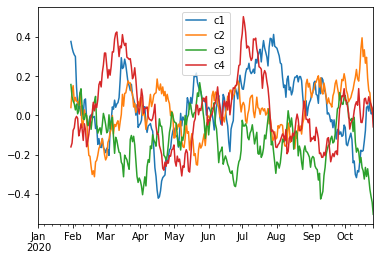

In [ ]:
df.rolling(30).mean().plot()

# 30일 기준의 이동평균
# plot을 붙여주면 차트로 보여준다.

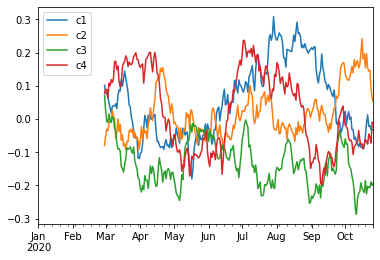

In [ ]:
df.rolling(60).mean().plot()

# 60일 이동평균

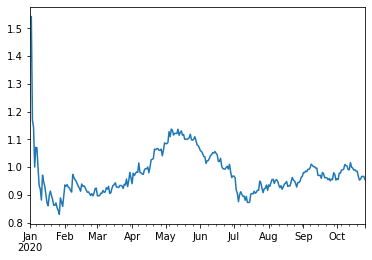

In [ ]:
# df의 c1에 대한 최소 기간은 10으로 한 60일간의 표준편차를 보여줘

df.c1.rolling(60, min_periods=1).std().plot()

df.rolling()


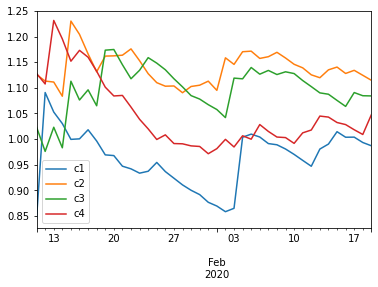

In [ ]:
# 일부분만 보고싶을 때 슬라이싱 하면 된다.

df.rolling(60, min_periods=10).std()[10:50].plot()

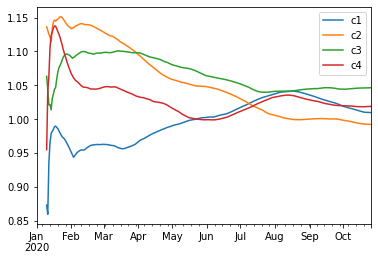

In [ ]:
# 확장되는 형태로 보여준다는데 expanding을 사용해서 이렇게 되었다.
## 근덴 확장되는 형태가 무슨 말이지... 설명 존나 못한다....

df.rolling(60, min_periods=10).std().expanding().mean().plot()

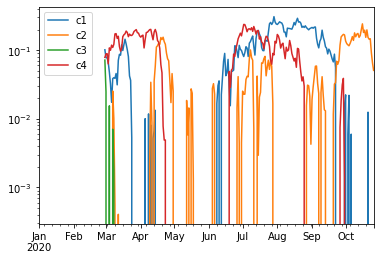

In [ ]:
# logy를 트루로 주면 logscale함수로 볼 수 있다.
# logx를 트루로 주면 x축을 로그함수로 볼 수 있겠군..

df.rolling(60).mean().plot(logy=True)

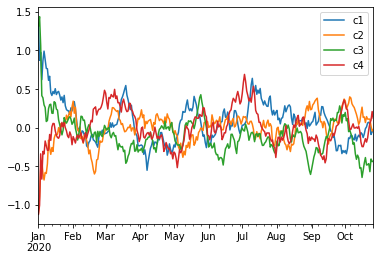

In [ ]:
df.rolling('20D').mean().plot()

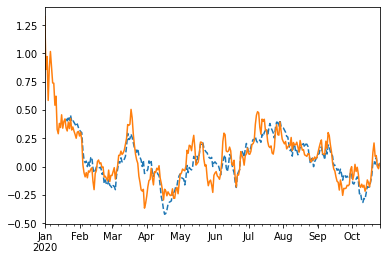

In [ ]:
# --는 점선이다. -는 실선.

df.c1.rolling(30, min_periods=20).mean().plot(style='--', label='Simple MA')
df.c1.ewm(span=30).mean().plot(style='-' , label='EWMA')

# ewm은 rolling과 expanding을 같이 쓰는 형태이다.

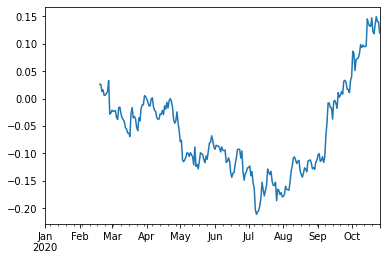

In [ ]:
# corr을 사용해서 c1과 c3의 상관관계를 분석할 수 있다.

df.c1.rolling(100, min_periods=50).corr(df.c3).plot()

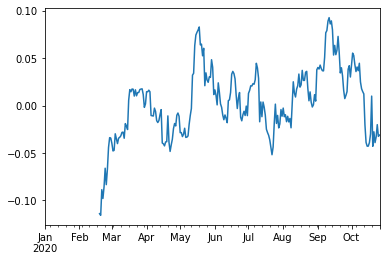

In [ ]:
# c2와 c4의 상관관계

df.c2.rolling(100, min_periods=50).corr(df.c4).plot()

## 데이터 읽기 및 저장

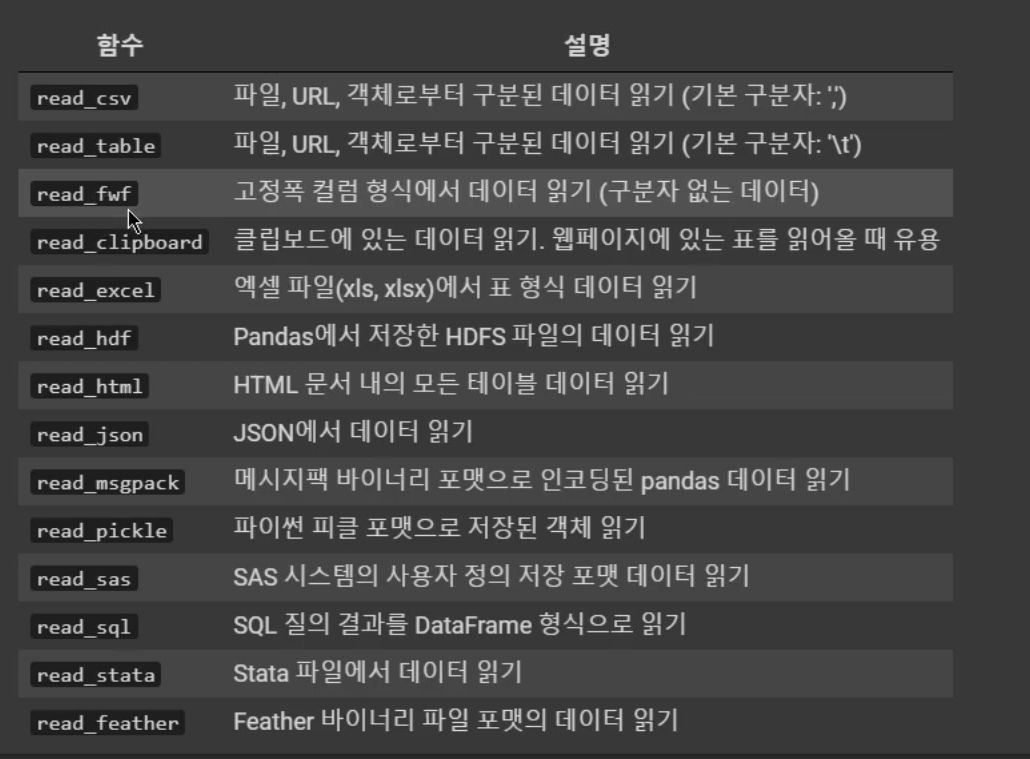

### 텍스트 파일 읽기/쓰기

In [ ]:
%%writefile example1.csv
a,b,c,d,e, text
1,2,3,4,5 , hi
6,7,8,9,10, pandas
11,12,13,14,15, csv

Overwriting example1.csv


In [ ]:
!ls

example1.csv  sample_data


In [ ]:
pd.read_csv('example1.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
%%writefile example2.csv

1,2,3,4,5 , hi
6,7,8,9,10, pandas
11,12,13,14,15, csv

Writing example2.csv


In [ ]:
# header가 없는 csv파일을 읽을 경우 해더가 없다는 정보를 주면 된다.

pd.read_csv('example2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
# 해더정보를 직접 주고 싶을 때는 names에 해더를 주면 된다. (text가 해더를 의미하는 군)

pd.read_csv('example2.csv', names=['a','b','c','d','e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
# 인덱슬 컬럼을 무엇을 사용할 지 주어줄 수 있다.

pd.read_csv('example2.csv', names=['a','b','c','d','e', 'text'], index_col='text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [ ]:
%%writefile example3.txt

      a    b     c
1    0.1  0.3    0.4
2    0.2  0.8    0.9

Writing example3.txt


In [ ]:
# sep를 사용해서 스페이스를 공백으로 주어주면 된다.

pd.read_table('example3.txt', sep='\s+')

,a,b,c
1,0.1,0.3,0.4
2,0.2,0.8,0.9


In [ ]:
%%writefile example4.csv
# 파일 설명
a,b,c,d,e, text
# 컬럼은 a,b,c,e,d와 text가 있음
1,2,3,4,5 , hi
6,7,8,9,10, pandas
11,12,13,14,15, csv

Writing example4.csv


In [ ]:
# skiprows를 사용해서 설명이 붙어있는 줄을 안 읽을 수 있다.

pd.read_csv('example4.csv' , skiprows=[0,2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
# csv파일에 누락값이 있는 경우 추후에 배운다.
## 누락값이 있는 것을 불러오면 그냥 판다스에서도 누락값이 뜬다

%%writefile example5.csv

a,b,c,d,e, text
1,2,NA,4,5 , hi
6,7,8,9,NULL, pandas
11,12,13,NA,15, csv

Overwriting example5.csv


In [ ]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NaN,4.0,5.0,hi
1,6,7,8.0,9.0,NaN,pandas
2,11,12,13.0,NaN,15.0,csv


In [ ]:
# 데이터분량이 방대한 경우, 일부만 가지고 오고 싶을때

%%writefile example6.csv

a,b,c,d,e, text
1,2,3,4,5 , hi
6,7,8,9,10, pandas
11,12,13,14,15, csv
1,2,3,4,5 , hi
6,7,8,9,10, pandas
11,12,13,14,15, csv
1,2,3,4,5 , hi
6,7,8,9,10, pandas
11,12,13,14,15, csv
1,2,3,4,5 , hi
6,7,8,9,10, pandas
11,12,13,14,15, csv

Writing example6.csv


In [ ]:
# 5개 rows만 가져오기

pd.read_csv('example6.csv', nrows=5)

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10,pandas


In [ ]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,1,2,3,4,5,hi
4,6,7,8,9,10,pandas
5,11,12,13,14,15,csv
6,1,2,3,4,5,hi
7,6,7,8,9,10,pandas
8,11,12,13,14,15,csv
9,1,2,3,4,5,hi


In [ ]:
# 파이썬에서 존재하는 df를 to_csv를 이용해서 csv파일로 저장할 수 있다.
## 파일을 불러와서(read_csv) 파이썬으로 가지고 놀고, to_csv로 다시 내보내면 되겠군...

df.to_csv('output.csv')

In [ ]:
! cat output.csv

,a,b,c,d,e, text
0,1,2,3,4,5, hi
1,6,7,8,9,10, pandas
2,11,12,13,14,15, csv
3,1,2,3,4,5, hi
4,6,7,8,9,10, pandas
5,11,12,13,14,15, csv
6,1,2,3,4,5, hi
7,6,7,8,9,10, pandas
8,11,12,13,14,15, csv
9,1,2,3,4,5, hi
10,6,7,8,9,10, pandas
11,11,12,13,14,15, csv


In [ ]:
# 파이썬에서 시리즈를 만들어 csv 파일로 저장하기

dr = pd.date_range('2020-01-01' , periods=10)
ts = pd.Series(np.arange(10) , index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int64

In [ ]:
# 해더를 추가해서 저장한다.

ts.to_csv('ts.csv', header = ['value'])

In [ ]:
! cat ts.csv

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9


In [ ]:
# json 데이터
## json은 무조건 ""이다. '로 하니 불러오질 못하는 군

%%writefile example.json

[{"a":1, "b":2, "c": 3, "d":4, "e":5},
 {"a":6, "b":7, "c": 8, "d":9, "e":10},
 {"a":11, "b":12, "c": 13, "d":14, "e":15}]

Overwriting example.json


In [ ]:
! cat example.json


[{"a":1, "b":2, "c": 3, "d":4, "e":5},
 {"a":6, "b":7, "c": 8, "d":9, "e":10},
 {"a":11, "b":12, "c": 13, "d":14, "e":15}]

In [ ]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,6,7,8,9,10
2,11,12,13,14,15


In [ ]:
# 아까 만들었던 ts데이터를 json 형식으로 저장하기

ts.to_json('output.json')

In [ ]:
! cat output.json

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}

In [ ]:
# 아까 만들었던 데이터프레임을 json으로 저장하기

df.to_json('output.json')

In [ ]:
! cat output.json

{"a":{"0":1,"1":6,"2":11,"3":1,"4":6,"5":11,"6":1,"7":6,"8":11,"9":1,"10":6,"11":11},"b":{"0":2,"1":7,"2":12,"3":2,"4":7,"5":12,"6":2,"7":7,"8":12,"9":2,"10":7,"11":12},"c":{"0":3,"1":8,"2":13,"3":3,"4":8,"5":13,"6":3,"7":8,"8":13,"9":3,"10":8,"11":13},"d":{"0":4,"1":9,"2":14,"3":4,"4":9,"5":14,"6":4,"7":9,"8":14,"9":4,"10":9,"11":14},"e":{"0":5,"1":10,"2":15,"3":5,"4":10,"5":15,"6":5,"7":10,"8":15,"9":5,"10":10,"11":15}," text":{"0":" hi","1":" pandas","2":" csv","3":" hi","4":" pandas","5":" csv","6":" hi","7":" pandas","8":" csv","9":" hi","10":" pandas","11":" csv"}}

### 이진 데이터 파일 읽기/쓰기

In [ ]:
df = pd.read_csv('example1.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
# pickle 형태로 저장하고 다시 불러오기
## 근데 pickle 형태가 뭐지??

df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [ ]:
df = pd.DataFrame({'a': np.random.randn(100),
                   'b': np.random.randn(100),
                  'c': np.random.randn(100)})

df

,a,b,c
0,-0.453934,0.582585,0.860065
1,-0.165003,-0.284873,0.360094
2,0.564536,-0.699956,0.946678
3,0.167437,-1.903452,0.365873
4,-0.372816,0.610928,0.523593
...,...,...,...
95,-1.476183,-0.525999,-0.271137
96,-1.431249,0.031111,-0.031883
97,-0.035208,-0.978910,-0.013458
98,0.777255,0.735684,0.262628


In [ ]:
# 계층을 가지고 저장한다고 한다.

h = pd.HDFStore('date.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: date.h5

In [ ]:
h['obj1']

,a,b,c
0,-0.453934,0.582585,0.860065
1,-0.165003,-0.284873,0.360094
2,0.564536,-0.699956,0.946678
3,0.167437,-1.903452,0.365873
4,-0.372816,0.610928,0.523593
...,...,...,...
95,-1.476183,-0.525999,-0.271137
96,-1.431249,0.031111,-0.031883
97,-0.035208,-0.978910,-0.013458
98,0.777255,0.735684,0.262628


In [ ]:
h.put('obj2' ,df, format= 'table')

In [ ]:
h.select('obj2' , where=['index > 50 and index < 60'])

,a,b,c
51,1.067264,-0.376464,0.188969
52,0.547849,-0.923109,1.603349
53,0.721048,1.997741,0.031164
54,0.266168,0.515324,0.673307
55,-0.773538,0.294641,-1.603077
56,-0.578474,0.893061,0.190665
57,1.140784,-0.645411,0.171973
58,-0.129525,-0.013912,-0.956721
59,-0.304068,-1.805776,-1.007653


In [ ]:
h.close()

In [ ]:
df.to_hdf('data.h5' , 'obj3' , format= 'table')

In [ ]:
pd.read_hdf('data.h5' , 'obj3' , where=['index < 10'])

,a,b,c
0,-0.453934,0.582585,0.860065
1,-0.165003,-0.284873,0.360094
2,0.564536,-0.699956,0.946678
3,0.167437,-1.903452,0.365873
4,-0.372816,0.610928,0.523593
5,0.167968,0.261101,0.283840
6,-1.035626,0.226567,0.996975
7,-0.102239,0.915904,1.909005
8,-1.345610,0.198769,-0.449283
9,0.061476,-0.577995,-0.652792


In [ ]:
# 엑셀파일로 저장해주기, sheet를 지정해 줄 수 있다.

df.to_excel('example.xlsx' , 'Sheet1')

In [ ]:
!ls

data.h5    example1.csv  example4.csv  example.json  output.json  ts.csv
date.h5    example2.csv  example5.csv  example.xlsx  sample_data
df_pickle  example3.txt  example6.csv  output.csv    to_csv


In [ ]:
# 엑셀읽어올 때는 Sheet를 지정해 줘야 한다.

pd.read_excel('example.xlsx', 'Sheet1')

,Unnamed: 0,a,b,c
0,0,-0.453934,0.582585,0.860065
1,1,-0.165003,-0.284873,0.360094
2,2,0.564536,-0.699956,0.946678
3,3,0.167437,-1.903452,0.365873
4,4,-0.372816,0.610928,0.523593
...,...,...,...,...
95,95,-1.476183,-0.525999,-0.271137
96,96,-1.431249,0.031111,-0.031883
97,97,-0.035208,-0.978910,-0.013458
98,98,0.777255,0.735684,0.262628


## 데이터 정제

### 누락값 처리

* 대부분의 실제 데이터들은 정제되지 않고 누락값들이 존재
* 서로 다른 데이터들은 다른 형태의 결측을 가짐
* 결측 데이터는 `null`, `NaN`, `NA`로 표기

#### None: 파이썬 누락 데이터
* 파이썬 내부에서의 누락 데이터는 None이다.

In [ ]:
a = np.array([1,2, None, 4,5])
a

# 이런 누락값들이 있으면 계산이나 처리를 하기 힘들다.

array([1, 2, None, 4, 5], dtype=object)

In [ ]:
# a.sum() 이런 건 계산이 되지 않는다.  None가 있기 때문에 오류가 난다 (Type Error)

TypeError: ignored

#### NaN: 누락된 수치 데이터

In [ ]:
a = np.array([1,2, np.nan, 4,5])
a.dtype

# 누락된 데이터인 np.nan이 있지만, 타입은 float로 뜬다.

dtype('float64')

In [ ]:
0 + np.nan

nan

In [ ]:
np.nan + np.nan

nan

In [ ]:
a.sum() , a.min() , a.max()

(nan, nan, nan)

In [ ]:
#np.nan이 있을 때를 대비해서 안전한 함수를 제공하고 있다.

np.nansum(a), np.nanmin(a) , np.nanmax(a)

(12.0, 1.0, 5.0)

In [ ]:
pd.Series([1,2,np.nan, 4 , None])

0    1.0
1    2.0
2    NaN
3    4.0
4    NaN
dtype: float64

In [ ]:
s = pd.Series(range(5) , dtype=int)
s

0    0
1    1
2    2
3    3
4    4
dtype: int64

In [ ]:
s[0] = None
s

# None을 넣었는데 자동으로 Nan으로 바뀌었다.

0    NaN
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [ ]:
s[3] = np.nan
s

# np.nan은 당연히 NaN이 된다.

0    NaN
1    1.0
2    2.0
3    NaN
4    4.0
dtype: float64

In [ ]:
s = pd.Series([True, False, None, np.nan])
s

0     True
1    False
2     None
3      NaN
dtype: object

#### Null 값 처리


In [ ]:
s = pd.Series([1,2, np.nan, 'String' , None])
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [ ]:
# isnull을 통해서 누락된 값이 있는 지 불리언으로 살펴본다.
s.isnull()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [ ]:
# 널이 아닌 것으로 인덱싱 -> 널이 아닌 것 들만 출력한다.

s[s.notnull()]

0         1
1         2
3    String
dtype: object

In [ ]:
# nan이든 None이든 없앤다.

s.dropna()

0         1
1         2
3    String
dtype: object

In [ ]:
df.dropna( axis='columns')

,a,b,c
0,-0.453934,0.582585,0.860065
1,-0.165003,-0.284873,0.360094
2,0.564536,-0.699956,0.946678
3,0.167437,-1.903452,0.365873
4,-0.372816,0.610928,0.523593
...,...,...,...
95,-1.476183,-0.525999,-0.271137
96,-1.431249,0.031111,-0.031883
97,-0.035208,-0.978910,-0.013458
98,0.777255,0.735684,0.262628


In [ ]:
df[3] = np.nan
df

,a,b,c,3
0,-0.453934,0.582585,0.860065,NaN
1,-0.165003,-0.284873,0.360094,NaN
2,0.564536,-0.699956,0.946678,NaN
3,0.167437,-1.903452,0.365873,NaN
4,-0.372816,0.610928,0.523593,NaN
...,...,...,...,...
95,-1.476183,-0.525999,-0.271137,NaN
96,-1.431249,0.031111,-0.031883,NaN
97,-0.035208,-0.978910,-0.013458,NaN
98,0.777255,0.735684,0.262628,NaN


In [ ]:
# 문제가 되는 null값들은 전부 지워버린다.

df.dropna(axis='columns' , how='all')

,a,b,c
0,-0.453934,0.582585,0.860065
1,-0.165003,-0.284873,0.360094
2,0.564536,-0.699956,0.946678
3,0.167437,-1.903452,0.365873
4,-0.372816,0.610928,0.523593
...,...,...,...
95,-1.476183,-0.525999,-0.271137
96,-1.431249,0.031111,-0.031883
97,-0.035208,-0.978910,-0.013458
98,0.777255,0.735684,0.262628


In [ ]:
# thresh가 3이기 때문에 오른쪽 끝까지 못갔다. 그래서 NaN을 못지웠음

df.dropna(axis='rows' , thresh=3)

,a,b,c,3
0,-0.453934,0.582585,0.860065,NaN
1,-0.165003,-0.284873,0.360094,NaN
2,0.564536,-0.699956,0.946678,NaN
3,0.167437,-1.903452,0.365873,NaN
4,-0.372816,0.610928,0.523593,NaN
...,...,...,...,...
95,-1.476183,-0.525999,-0.271137,NaN
96,-1.431249,0.031111,-0.031883,NaN
97,-0.035208,-0.978910,-0.013458,NaN
98,0.777255,0.735684,0.262628,NaN


In [ ]:
s

0         1
1         2
2       NaN
3    String
4      None
dtype: object

In [ ]:
# fillna를 사용해서 특정 값으로 NaN이나 None같은 비어있는 값을 채워줄 수 있다.

s.fillna(0)

0         1
1         2
2         0
3    String
4         0
dtype: object

In [ ]:
# ffill : 앞에 있는 값을 NaN이나 None에 채운다.

s.fillna(method= 'ffill')

0         1
1         2
2         2
3    String
4    String
dtype: object

In [ ]:
# bfill : 뒤에 있는 값을 NaN이나 None에 채운다

s.fillna(method= 'bfill')

0         1
1         2
2    String
3    String
4      None
dtype: object

In [ ]:
df

,a,b,c,3
0,-0.453934,0.582585,0.860065,NaN
1,-0.165003,-0.284873,0.360094,NaN
2,0.564536,-0.699956,0.946678,NaN
3,0.167437,-1.903452,0.365873,NaN
4,-0.372816,0.610928,0.523593,NaN
...,...,...,...,...
95,-1.476183,-0.525999,-0.271137,NaN
96,-1.431249,0.031111,-0.031883,NaN
97,-0.035208,-0.978910,-0.013458,NaN
98,0.777255,0.735684,0.262628,NaN


In [ ]:
# 앞에서 본 시리즈와 다른 점은 dataframe는 axis를 지정해 주어야 한다는 것이다.

df.fillna(method='ffill', axis=0)

# axis = 0은 위에서 아래로 내려가는 것이라서 ffill을 사용하니 당연히 아무것도 채워지지 않았다.

,a,b,c,3
0,-0.453934,0.582585,0.860065,NaN
1,-0.165003,-0.284873,0.360094,NaN
2,0.564536,-0.699956,0.946678,NaN
3,0.167437,-1.903452,0.365873,NaN
4,-0.372816,0.610928,0.523593,NaN
...,...,...,...,...
95,-1.476183,-0.525999,-0.271137,NaN
96,-1.431249,0.031111,-0.031883,NaN
97,-0.035208,-0.978910,-0.013458,NaN
98,0.777255,0.735684,0.262628,NaN


In [ ]:
# axis를 1로 주면 당연히 c컬럼에 있는 값을 NaN에 채운다.

df.fillna(method='ffill', axis=1)

,a,b,c,3
0,-0.453934,0.582585,0.860065,0.860065
1,-0.165003,-0.284873,0.360094,0.360094
2,0.564536,-0.699956,0.946678,0.946678
3,0.167437,-1.903452,0.365873,0.365873
4,-0.372816,0.610928,0.523593,0.523593
...,...,...,...,...
95,-1.476183,-0.525999,-0.271137,-0.271137
96,-1.431249,0.031111,-0.031883,-0.031883
97,-0.035208,-0.978910,-0.013458,-0.013458
98,0.777255,0.735684,0.262628,0.262628


In [ ]:
df.fillna(method='bfill' , axis=0)

,a,b,c,3
0,-0.453934,0.582585,0.860065,NaN
1,-0.165003,-0.284873,0.360094,NaN
2,0.564536,-0.699956,0.946678,NaN
3,0.167437,-1.903452,0.365873,NaN
4,-0.372816,0.610928,0.523593,NaN
...,...,...,...,...
95,-1.476183,-0.525999,-0.271137,NaN
96,-1.431249,0.031111,-0.031883,NaN
97,-0.035208,-0.978910,-0.013458,NaN
98,0.777255,0.735684,0.262628,NaN


In [ ]:
# bfill이기 때문에 당연히 채워지지 않는다. 컬럼3뒤에 있는 값이 없다.

df.fillna(method='bfill' , axis=0)

,a,b,c,3
0,-0.453934,0.582585,0.860065,NaN
1,-0.165003,-0.284873,0.360094,NaN
2,0.564536,-0.699956,0.946678,NaN
3,0.167437,-1.903452,0.365873,NaN
4,-0.372816,0.610928,0.523593,NaN
...,...,...,...,...
95,-1.476183,-0.525999,-0.271137,NaN
96,-1.431249,0.031111,-0.031883,NaN
97,-0.035208,-0.978910,-0.013458,NaN
98,0.777255,0.735684,0.262628,NaN


### 중복 제거

In [ ]:
df = pd.DataFrame({'c1' : ['a' ,'b','c'] *2 + ['b'] +['c'],
                   'c2' : [1,2,1,1,2,3,3,4]})
df

,c1,c2
0,a,1
1,b,2
2,c,1
3,a,1
4,b,2
5,c,3
6,b,3
7,c,4


In [ ]:
# 듀플리케이트를 사용하면 중복이 되냐 안되냐를 볼 수 있다.

df.duplicated()

0    False
1    False
2    False
3     True
4     True
5    False
6    False
7    False
dtype: bool

In [ ]:
# 중복을 제거할 수 있다.

df.drop_duplicates()

,c1,c2
0,a,1
1,b,2
2,c,1
5,c,3
6,b,3
7,c,4


### 값 치환

In [ ]:
# 가끔 데이터가 없다는 것을 나타내기 위해서 이상한 데이터 ( -999, -1000 같은)를 넣어두는 경우가 있다.

s = pd.Series([1,2,-999, 3, -1000, 4])
s

0       1
1       2
2    -999
3       3
4   -1000
5       4
dtype: int64

In [ ]:
# -999를 nan으로 변경해 준다.

s.replace(-999, np.nan)

0       1.0
1       2.0
2       NaN
3       3.0
4   -1000.0
5       4.0
dtype: float64

In [ ]:
s.replace([-1000, -999], np.nan)

0    1.0
1    2.0
2    NaN
3    3.0
4    NaN
5    4.0
dtype: float64

In [ ]:
# 여러개를 mapping해서 자세하게 바꿔줄 수 있다.

s.replace([-1000, -999], [np.nan,0] )

0    1.0
1    2.0
2    0.0
3    3.0
4    NaN
5    4.0
dtype: float64

## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly